# Load CERT Dataset

In [1]:
from IPython.core.display import display
from tensorflow.python.client import device_lib
import pickle
import os
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras import Model, Sequential, Input, backend
from keras.layers import Conv2D, LeakyReLU, Dropout, Flatten, Dense, Activation, Embedding, Concatenate, Reshape
from keras.callbacks import ModelCheckpoint
from keras.layers.merge import _Merge
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, LeakyReLU, Dropout, Flatten, Dense, Activation, Embedding, Concatenate, Reshape
from keras.callbacks import ModelCheckpoint
import itertools
from sklearn import svm
from collections import OrderedDict, Counter
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model, load_model
import seaborn as sns
import random
import glob
%pip install plotly
%pip install --upgrade pandas==1.3.5

from imblearn.over_sampling import SMOTE 
from joblib import Parallel, delayed
from tqdm import tqdm  
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns
import time
from plotly.offline import init_notebook_mode, iplot
%matplotlib notebook
%matplotlib inline

from pathlib import Path

from mpl_toolkits.mplot3d import Axes3D
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
display(device_lib.list_local_devices())

# Make sure to mount google drive
DATA_DIR = 'drive/MyDrive/CERT/data'
DATASET_NAME = 'dayr4.2-percentile30'

df = joblib.load(os.path.join(DATA_DIR, f'{DATASET_NAME}.pkl'))
df = df.drop(['user', 'day', 'week','starttime','endtime'], axis=1)

label_name = 'insider'

top_feature_names = ['n_http', 'http_n-pc0', 'usb_n-pc0', 'allact_n-pc0', 'n_allact', 'n_usb', 'usb_mean_usb_dur', 'email_n-pc0', 'n_email', 'n_workhourallact', 'workhourhttp_jobf_mean_http_c_len', 'afterhourfile_txtf_n-pc0', 'team', 'n_workhourusb', 'workhourhttp_jobf_mean_url_len', 'workhourallact_n-pc0', 'workhourusb_mean_usb_dur', 'afterhourfile_n_txtf', 'workhourhttp_jobf_mean_http_c_nwords', 'http_n_leakf', 'logon_n-pc0', 'http_leakf_mean_url_depth', 'E', 'A', 'http_leakf_mean_url_len', 'email_n-Xemail1', 'workhourusb_n-pc0', 'http_jobf_mean_http_c_len', 'http_jobf_mean_http_c_nwords', 'workhourhttp_socnetf_mean_http_c_nwords', 'workhourhttp_otherf_mean_url_depth', 'workhourhttp_otherf_mean_http_c_nwords', 'http_socnetf_mean_url_depth', 'http_mean_url_depth', 'email_mean_n_des', 'afterhourusb_n-pc0', 'afterhourhttp_n_leakf', 'afterhourhttp_mean_url_depth', 'O', 'n_workhouremail', 'n_afterhourlogon', 'http_jobf_mean_url_len', 'file_mean_file_nwords', 'file_docf_n-disk0', 'email_n-exbccmail1', 'afterhourhttp_leakf_mean_http_c_len', 'workhourhttp_socnetf_mean_url_depth', 'workhourhttp_jobf_mean_url_depth', 'workhourfile_n_docf', 'workhourfile_docf_n-disk0', 'http_leakf_n-pc0', 'http_leakf_mean_http_c_len', 'http_jobf_mean_url_depth', 'email_mean_n_exdes', 'email_mean_email_size', 'afterhourhttp_otherf_mean_url_depth', 'afterhourhttp_otherf_mean_http_c_nwords', 'afterhourhttp_leakf_n-pc0', 'afterhourhttp_leakf_mean_http_c_nwords', 'afterhourhttp_jobf_mean_http_c_nwords', 'workhourfile_txtf_mean_file_nwords', 'workhourfile_n-disk0', 'workhouremail_n-Xemail1', 'workhouremail_mean_email_text_slen', 'http_socnetf_mean_http_c_len', 'http_otherf_n-pc0', 'http_otherf_mean_url_depth', 'afterhourhttp_leakf_mean_url_depth', 'afterhourfile_n_docf', 'afterhouremail_mean_n_atts', 'workhourlogon_n-pc0', 'workhourhttp_mean_http_c_len', 'workhourhttp_jobf_n-pc0', 'workhourfile_mean_file_nwords', 'workhourfile_mean_file_len', 'workhourfile_docf_mean_file_len', 'workhouremail_n-pc0', 'workhouremail_n-exbccmail1', 'n_workhourlogon', 'http_n_otherf', 'http_jobf_n-pc0', 'file_mean_file_len', 'file_docf_mean_file_len', 'file_compf_n-disk0', 'afterhourlogon_n-pc0', 'afterhourhttp_otherf_n-pc0', 'afterhourhttp_mean_http_c_len', 'afterhourhttp_leakf_mean_url_len', 'C', 'workhourlogon_n-pc2', 'workhourhttp_n_jobf', 'workhourhttp_n-pc0', 'workhourhttp_mean_url_depth', 'workhourhttp_mean_http_c_nwords', 'workhourhttp_hackf_mean_http_c_nwords', 'workhourfile_txtf_mean_file_len', 'workhourfile_docf_n-pc0', 'workhouremail_mean_n_bccdes', 'http_socnetf_mean_http_c_nwords', 'http_otherf_mean_url_len']
top100_feature_indicies = [df.columns.get_loc(c) for c in df[top_feature_names]]
all_feature_indicies = [df.columns.get_loc(c) for c in df.iloc[:, :-1]]
display(df)
display(len(all_feature_indicies))
num_features = len(df.columns) - 1

print('Total Class Counts:')
cls_counts = df['insider'].value_counts()
display(cls_counts)

raw_data = df.values
labels = raw_data[:, -1]

data = np.asarray(raw_data[:, :-1], dtype=np.float32)
data = data / 50  # Normalize dataset between -1 and 1

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.25, random_state=42, stratify=labels
)

X_normal_train = X_train[y_train == 0]
y_normal_train = y_train[y_train == 0]

X_normal_test = X_test[y_test == 0]
y_normal_test = y_test[y_test == 0]

X_anom_train = X_train[y_train > 0]
y_anom_train = y_train[y_train > 0]

X_anom_test = X_test[y_test > 0]
y_anom_test = y_test[y_test > 0]

# Load CERT R5.2
df = joblib.load(os.path.join(DATA_DIR, f'dayr5.2-percentile30-504fea.pkl'))
y_r52 = df.values[:, -1]

X_r52 = np.asarray(df.values[:, :-1], dtype=np.float32)
X_r52 = X_r52 / 50

r52_top100_feature_indicies = [df.columns.get_loc(c) for c in df[top_feature_names]]
r52_all_feature_indicies = [df.columns.get_loc(c) for c in df.iloc[:, :-1]]

# Load CERT R6.2
df = joblib.load(os.path.join(DATA_DIR, f'dayr6.2-percentile30-504fea.pkl'))
y_r62 = df.values[:, -1]

X_r62 = np.asarray(df.values[:, :-1], dtype=np.float32)
X_r62 = X_r62 / 50

r62_top100_feature_indicies = [df.columns.get_loc(c) for c in df[top_feature_names]]
r62_all_feature_indicies = [df.columns.get_loc(c) for c in df.iloc[:, :-1]]

run_name = f'testrun'
model_dir = os.path.join('drive/MyDrive/CERT/model/wcgan', run_name)
img_dir = os.path.join(model_dir, 'img')
Path(img_dir).mkdir(parents=True, exist_ok=True)

# feature_indicies, r52_feature_indicies, r62_feature_indicies = all_feature_indicies, r52_all_feature_indicies, r62_all_feature_indicies
feature_indicies, r52_feature_indicies, r62_feature_indicies = top100_feature_indicies, r52_top100_feature_indicies, r62_top100_feature_indicies
# df, raw_data = pd.DataFrame(), pd.DataFrame()

X_train_fea = X_train[:, feature_indicies]
X_test_fea = X_test[:, feature_indicies]
n_features = len(feature_indicies)


class BalancedDataGenerator(keras.utils.Sequence):
    'Generates balanced data batches for Keras'
    def __init__(self, data, labels, batch_size=32, dim=(100,), shuffle=True, label_weights=None):

        self.class_labels = np.unique(labels)
        self.n_classes = len(self.class_labels)

        self.class_indices = {cls: np.where(labels == cls)[0] for cls in self.class_labels}
        self.class_counts = {cls: len(idxs) for (cls, idxs) in self.class_indices.items()}
        self.min_class, self.min_class_size = min(self.class_counts.items(), key=lambda x: x[1])
        print(f'class_counts: {self.class_counts}')
    
        if not label_weights:
            self.label_weights = {cls: 1/len(self.class_labels) for cls in self.class_labels}
        elif len(label_weights) != len(self.class_labels) or sum([weight for (_, weight) in label_weights.items()]) != 1.0:
            raise Exception('Label weights must sum to 1')
        else:
            self.label_weights = label_weights
        print(f'label_weights: {self.label_weights}')
        self.batch_size = batch_size
        self.batch_sizes = {cls: np.floor(batch_size * self.label_weights.get(cls)) for (cls, weight) in self.label_weights.items()}

        print(f'batch_sizes: {self.batch_sizes}')
        if batch_size != sum(self.batch_sizes.values()):
            raise Exception('Batch size * label weight must be an integer or batches wont be filled properly')
            
        self.batches_per_epoch = {cls: np.floor_divide(self.class_counts.get(cls), self.batch_sizes.get(cls)) for cls in self.class_labels if self.batch_sizes.get(cls) > 0}
        print(f'batches_per_epoch: {self.batches_per_epoch}')

        for (cls, count) in self.class_counts.items():
            class_batch_size = self.batch_sizes.get(cls)
            if class_batch_size > count:
                raise Exception(f'Class {cls} batch size ({class_batch_size}) must be smaller than its sample count ({count})')
        self.dim = dim
        self.labels = labels
        self.data = data
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(min(self.batches_per_epoch.values()))

    def __getitem__(self, index):
        'Generate one batch of data with balanced class cardinality'
        class_indices_list = [] 
        for (cls, indicies) in self.class_indices.items():
            class_batch_size = int(self.batch_sizes.get(cls))
            class_batch = indicies[index*class_batch_size:(index+1)*class_batch_size]
            class_indices_list.append(class_batch)
        batch_idxs = np.concatenate(class_indices_list, axis=0)
        X, y = self.__data_generation(batch_idxs)

        return X, y 
    
    def get_batch(self, shuffle=True, categorical=False):
        X, y = self.__getitem__(0)
        shuffled_indices = tf.random.shuffle(range(len(y)))
        X = tf.cast(tf.gather(X, shuffled_indices), dtype=tf.float32)
        y = tf.gather(y, shuffled_indices)
        if not categorical:
            y = tf.cast(tf.math.argmax(y, axis=-1), dtype=tf.float32)
        return X, y
            
    
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle == True:
            for (cls, indicies) in self.class_indices.items():
                np.random.shuffle(indicies)

    def __data_generation(self, batch_idxs):
        'Generates data containing batch_size samples'
        X = np.empty((self.batch_size, *self.dim))
        y = np.empty((self.batch_size), dtype=int)

        for i, idx in enumerate(batch_idxs):
            X[i,] = self.data[idx]
            y[i] = self.labels[idx]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

        
class DataSampler():
    def __init__(self, data, labels, label_weights=None):
        self.data = data
        self.labels = labels
        self.class_labels = np.unique(labels)
        self.n_classes = len(self.class_labels)
        if not label_weights:
            # Assign equal weights to all classes
            label_weights = {cls: 1 for cls in self.class_labels} 
        self.label_weights = label_weights

        self.class_indices = {cls: np.where(labels == cls)[0] for cls in self.class_labels}
        self.class_counts = {cls: len(idxs) for (cls, idxs) in self.class_indices.items()}
        self.min_class, self.min_class_size = min(self.class_counts.items(), key=lambda x: x[1])
        print(f'class_counts: {self.class_counts}')
    
        if not label_weights:
            self.label_weights = {cls: 1/len(self.class_labels) for cls in self.class_labels}
        else:
            self.label_weights = label_weights
        print(f'label_weights: {self.label_weights}')

    def get_batch(self, n_samples):
        pop = self.label_weights.keys()
        weights = self.label_weights.values()
        slots = random.choices(population=list(pop), weights=list(weights), k=n_samples)
        idxs = [random.choice(self.class_indices.get(cls)) for cls in slots]
        X = tf.cast(tf.gather(self.data, idxs), dtype=tf.float32)
        y = tf.cast(tf.gather(self.labels, idxs), dtype=tf.int32)
        return X, y


class PlotTSNE(keras.callbacks.Callback):
    def __init__(self, X, y, img_dir, plot_name, n_samples=1448, period=1):
        super(PlotTSNE, self).__init__()
        self.plot_name = plot_name
        self.X = X
        self.y = y
        self.n_samples = n_samples
        self.period = period
        self.target_classes, _ = tf.unique(y)
        self.n_classes = len(self.target_classes)
        self.img_dir = img_dir
        if self.n_classes < 4:
            self.label_map = {'label': {0: 'Normal', 1: 'Insider'}}
            self.gen_label_map = {'label': {0: 'Generated Normal', 1: 'Generated Insider'}}
            self.palette = ['darkviolet', 'darkgreen', 'red', 'blue']
            self.markers = ['X', 'X', 'o', 'o']
        else:
            self.label_map = {'label': {0: 'Normal', 1: 'Insider (Sc. 1)', 
                                        2: 'Insider (Sc. 2)', 3: 'Insider (Sc. 3)'}}
            self.gen_label_map = {'label': {0: 'Generated Normal', 1: 'Generated Insider (Sc. 1)',
                                            2: 'Generated Insider (Sc. 2)', 3: 'Generated Insider (Sc. 3)'}}
            self.palette = ['darkviolet', 'darkgreen', 'hotpink', 'cyan', 'orange', 'brown', 'red', 'blue']
            self.markers = ['X', 'X', 'X', 'X', 'o', 'o', 'o', 'o']
    
    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.period != 0:
            return
        gen_X, z_labels = self.model.generate(n_samples=self.n_samples, 
                                              sample_classes=self.target_classes)
        gen_df = pd.DataFrame()
        gen_df['label'] = z_labels
        gen_df.replace(self.gen_label_map, inplace=True)

        df = pd.DataFrame()
        df['label'] = self.y
        df = df.append(gen_df)
        df.replace(self.label_map, inplace=True)

        tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
        X_combined = tf.concat([self.X, gen_X], axis=0)
        y_combined = tf.concat([self.y, z_labels], axis=0)

        tsne_results = tsne.fit_transform(X_combined)

        df['tsne-x'] = tsne_results[:,0]
        df['tsne-y'] = tsne_results[:,1]

        df = df.sort_values(by=['label'])
        plt.figure(figsize=(16, 10))
        sns.scatterplot(
            x="tsne-x", y="tsne-y",
            hue="label",
            style="label",
            palette=self.palette,
            markers=self.markers,
            data=df,
            alpha=0.5
        )
        plt.title(f't-SNE Plot - {self.plot_name} - Epoch {epoch}')
        plt.legend(loc='upper right')
        plt.tight_layout()
        img_path = os.path.join(self.img_dir, f'{self.plot_name}-Epoch{epoch:06d}-tSNE.png')
        plt.savefig(img_path)
        plt.show()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16725912657172691803
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16154099712
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13584686666471780237
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

,isweekday,isweekend,n_allact,allact_n-pc0,allact_n-pc1,allact_n-pc2,allact_n-pc3,n_workhourallact,workhourallact_n-pc0,workhourallact_n-pc1,...,f_unit,dept,team,ITAdmin,O,C,E,A,N,insider
0,0.000000,0.000000,-38.636364,-38.636364,0.0,0.000000,0.0,-38.636364,-38.636364,0.0,...,4.0,10.0,19.0,0.0,26.0,22.0,17.0,39.0,32.0,0.0
1,0.000000,0.000000,-27.272727,-27.272727,0.0,0.000000,0.0,-27.272727,-27.272727,0.0,...,4.0,10.0,19.0,0.0,26.0,22.0,17.0,39.0,32.0,0.0
2,0.000000,0.000000,-50.000000,-50.000000,0.0,0.000000,0.0,-50.000000,-50.000000,0.0,...,4.0,10.0,19.0,0.0,26.0,22.0,17.0,39.0,32.0,0.0
3,0.000000,0.000000,50.000000,50.000000,0.0,0.000000,0.0,-45.000000,-45.000000,0.0,...,4.0,10.0,19.0,0.0,26.0,22.0,17.0,39.0,32.0,0.0
4,0.000000,0.000000,47.619048,47.619048,0.0,0.000000,0.0,19.047619,19.047619,0.0,...,4.0,10.0,19.0,0.0,26.0,22.0,17.0,39.0,32.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308018,13.793103,-13.793103,0.000000,1.724138,0.0,-3.448276,0.0,12.068966,13.793103,0.0,...,4.0,10.0,30.0,0.0,13.0,15.0,40.0,44.0,33.0,0.0
308019,13.793103,-13.793103,0.000000,1.724138,0.0,-3.448276,0.0,37.931034,37.931034,0.0,...,4.0,10.0,30.0,0.0,13.0,15.0,40.0,44.0,33.0,0.0
308020,-36.206897,36.206897,-39.655172,-39.655172,0.0,-1.724138,0.0,25.862069,25.862069,0.0,...,4.0,10.0,30.0,0.0,13.0,15.0,40.0,44.0,33.0,0.0
308021,-34.482759,34.482759,-37.931034,-37.931034,0.0,-1.724138,0.0,-36.206897,-36.206897,0.0,...,4.0,10.0,30.0,0.0,13.0,15.0,40.0,44.0,33.0,0.0


504

Total Class Counts:


0.0    307057
2.0       861
1.0        85
3.0        20
Name: insider, dtype: int64


# Insider Threat Scenario Descriptions
*Scenario Descriptions from Dataset*
1. **Data Leak:**
User who did not previously use removable drives or work after
hours begins logging in after hours, using a removable drive, and
uploading data to wikileaks.org. Leaves the organization shortly
thereafter.

2. **Data Theft (USB):**
User begins surfing job websites and soliciting employment from a
competitor. Before leaving the company, they use a thumb drive (at
markedly higher rates than their previous activity) to steal data.

3. **IT Sabotage:**
System administrator becomes disgruntled. Downloads a keylogger and
uses a thumb drive to transfer it to his supervisor's machine. The
next day, he uses the collected keylogs to log in as his supervisor
and send out an alarming mass email, causing panic in the
organization. He leaves the organization immediately.

4. **Data Theft (Email)**
A user logs into another user's machine and searches for
interesting files, emailing to their home email. This behavior occurs
more and more frequently over a 3 month period.

5. **Data Theft (Dropbox)**
A member of a group decimated by layoffs uploads documents to
Dropbox, planning to use them for personal gain.


In [2]:
target_map = {0: 'Normal', 1: 'Insider (Sc.1)', 2: 'Insider (Sc.2)', 3: 'Insider (Sc.3)', 4: 'Insider (Sc.4)', 5: 'Insider (Sc.5)'}
scenario_map = {0: 'Normal', 1: 'Data Leak', 2: 'Data Theft (USB)', 3: 'IT Sabotage', 4: 'Data Theft (Email)', 5: 'Data Theft (Dropbox'}
binary_target_map = {0: 'Normal', 1: 'Insider'}

train_class_counts = {cls: len(X_train[y_train == cls]) for cls in [0, 1, 2, 3, 4, 5]}
test_class_counts = {cls: len(X_test[y_test == cls]) for cls in [0, 1, 2, 3, 4, 5]}
display('Train Set Counts', train_class_counts)
display('Test Set Counts', test_class_counts)

# scenario_names = [f'{a}\n{b}' for a,b in zip(list(target_map.values()), list(scenario_map.values()))]

cls_count_df = pd.DataFrame(columns=['Dataset Name'] + list(target_map.values()))
for i, (dataset_name, dataset_labels) in enumerate([('CERT R4.2', labels), ('CERT R5.2', y_r52), ('CERT R6.2', y_r62)]):
    counts = [len(dataset_labels[dataset_labels==label]) for label in [0,1,2,3,4,5]]
    display(counts)
    cls_count_df.loc[i] = [dataset_name] + counts

display(cls_count_df)
with open('class_counts.tex', 'w') as tf:
    tf.write(cls_count_df.to_latex(index=False))

'Train Set Counts'

{0: 230292, 1: 64, 2: 646, 3: 15, 4: 0, 5: 0}

'Test Set Counts'

{0: 76765, 1: 21, 2: 215, 3: 5, 4: 0, 5: 0}

[307057, 85, 861, 20, 0, 0]

[647441, 85, 863, 20, 339, 0]

[1304406, 3, 20, 2, 1, 1]

,Dataset Name,Normal,Insider (Sc.1),Insider (Sc.2),Insider (Sc.3),Insider (Sc.4),Insider (Sc.5)
0,CERT R4.2,307057,85,861,20,0,0
1,CERT R5.2,647441,85,863,20,339,0
2,CERT R6.2,1304406,3,20,2,1,1


# CGAN

## Model Definition

In [ ]:
batch_size = 16
num_classes = 4
num_features = 100
latent_dim = 16

generator_in_channels = latent_dim + num_classes
discriminator_in_channels = num_classes

def build_discriminator():
    in_data = Input(shape=(num_features, ))
    in_label = Input(shape=(num_classes,))

    merge = Concatenate()([in_data, in_label])

    fe = Dense(64)(merge)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = Dense(32)(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    
    out_layer = Dense(1, activation='sigmoid')(fe)

    model = Model([in_data, in_label], out_layer, name='discriminator')
    return model

def build_generator():
    in_lat = Input(shape=(latent_dim,), name='z_input')
    in_label = Input(shape=(num_classes,), name='class_label')
    merge = Concatenate()([in_lat, in_label])    

    gen = Dense(32)(merge)
    gen = LeakyReLU(alpha=0.2)(gen)
    gen = Dense(64)(gen)
    gen = LeakyReLU(alpha=0.2)(gen)
    out_layer = Dense(num_features, activation='tanh')(gen)

    model = Model([in_lat, in_label], out_layer, name='generator')
    return model


class ConditionalGAN(keras.Model):
    def __init__(self, latent_dim, n_classes=2):
        super(ConditionalGAN, self).__init__()
        self.discriminator = build_discriminator()
        self.generator = build_generator()
        self.latent_dim = latent_dim
        self.n_classes = n_classes
        self.gen_loss_tracker = tf.keras.metrics.Mean(name="generator_loss")
        self.disc_loss_tracker = tf.keras.metrics.Mean(name="discriminator_loss")

    @property
    def metrics(self):
        return [self.gen_loss_tracker, 
                self.disc_loss_tracker]

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(ConditionalGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
    
    def generate(self, n_samples, sample_classes):
        
        n_samples_per_class = np.floor_divide(n_samples, len(sample_classes))
        n_samples = n_samples_per_class * len(sample_classes)
        labels = np.repeat(sample_classes, n_samples_per_class)
        one_hot_labels = to_categorical(labels, num_classes=self.n_classes)

        random_latent_vectors = tf.random.normal(shape=(n_samples, self.latent_dim))
        generated_samples = self.generator([random_latent_vectors, one_hot_labels])
        return generated_samples, labels

    def call(self, x):
        pass
        # predictions = self.discriminator(x)
        # return predictions

    def train_step(self, data):
        # Unpack the data.
        real_X, one_hot_labels = data

        # Sample random points in the latent space and concatenate the labels.
        # This is for the generator.
        batch_size = tf.shape(real_X)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode the noise (guided by labels) to fake samples.
        generated_X = self.generator([random_latent_vectors, one_hot_labels])

        # Assemble labels discriminating real from fake samples.
        fake_labels = tf.ones((batch_size, 1))
        real_labels = tf.zeros((batch_size, 1))

        with tf.GradientTape() as tape:
            predictions = self.discriminator([real_X, one_hot_labels])
            d_loss_real = self.loss_fn(real_labels, predictions)
        grads = tape.gradient(d_loss_real, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        with tf.GradientTape() as tape:
            predictions = self.discriminator([generated_X, one_hot_labels])
            d_loss_fake = self.loss_fn(fake_labels, predictions)

        grads = tape.gradient(d_loss_fake, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space.
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real samples".
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (don't update the weights of the discriminator)
        with tf.GradientTape() as tape:
            fake_images = self.generator([random_latent_vectors, one_hot_labels])
            predictions = self.discriminator([fake_images, one_hot_labels])
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.disc_loss_tracker.update_state(d_loss_real + d_loss_fake)
        
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "d_loss": self.disc_loss_tracker.result(),
        }


## Train CGAN Model

In [ ]:
n_samples = 480
cgan_model_dir = os.path.join('drive/MyDrive/CERT/model/cgan', RUN_NAME)
cgan_img_dir = os.path.join(cgan_model_dir, 'img')

cgan = ConditionalGAN(latent_dim=latent_dim, n_classes=num_classes)
cgan.compile(
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9),
    loss_fn=tf.keras.losses.BinaryCrossentropy()
)

dataset = BalancedDataGenerator(X_train, y_train, 
                                label_weights={0: 6/16, 1: 4/16, 2: 5/16, 3: 1/16},
                                dim=(num_features,), batch_size=batch_size)

checkpoint_path = os.path.join(cgan_model_dir, 'cgan_epoch{epoch:06d}.ckpt')
checkpoint = ModelCheckpoint(checkpoint_path, verbose=1,
                             save_weights_only=True, period=100)

tsne_dataset = DataSampler(X_train, y_train, label_weights={0: 6/16, 1: 4/16, 2: 6/16, 3: 1/16})
X_subset, y_subset = tsne_dataset.get_batch(2000)


plot_tsne = PlotTSNE(X_subset, y_subset, 
                     img_dir=cgan_img_dir, plot_name='CGAN',
                     n_samples=n_samples*2, period=1000)
cgan.save_weights(checkpoint_path.format(epoch=0))
history = cgan.fit(dataset, epochs=10001, callbacks=[checkpoint, plot_tsne])

plt.show()
plt.plot(history.history['g_loss'])
plt.plot(history.history['d_loss'])

plt.title('CGAN Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Gen. Loss', 'Critic Loss', ])
plt.savefig(os.path.join(cgan_img_dir, 'cgan-train-history.png'))
plt.show()


# WCGAN-GP
Wasserstein Conditional Generative Adversarial Network with Gradient Penalty

## Model Definition

In [ ]:

def critic_loss(real_sample, fake_sample):
    return tf.reduce_mean(fake_sample) - tf.reduce_mean(real_sample)

def generator_loss(fake_sample):
    return -tf.reduce_mean(fake_sample)


def build_critic(n_features, n_classes, arch):
    in_data = Input(shape=(n_features, ))
    in_label = Input(shape=(n_classes,))

    fe = Concatenate()([in_data, in_label])
    if arch == 'DeepV1':
        fe = Dense(256)(fe)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Dense(128)(fe)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Dense(64)(fe)
        fe = LeakyReLU(alpha=0.2)(fe)
    elif arch == 'ShallowV1':
        fe = Dense(64)(fe)
        fe = LeakyReLU(alpha=0.2)(fe)
        fe = Dense(32)(fe)
        fe = LeakyReLU(alpha=0.2)(fe)

    out_layer = Dense(1, activation='relu')(fe)

    model = Model([in_data, in_label], out_layer, name='critic')
    return model

def build_generator(n_features, latent_dim, n_classes, arch):
    in_lat = Input(shape=(latent_dim,), name='z_input')
    in_label = Input(shape=(n_classes,), name='class_label')
    gen = Concatenate()([in_lat, in_label])    

    if arch == 'DeepV1':
        gen = Dense(64)(gen)
        gen = LeakyReLU(alpha=0.2)(gen)
        gen = Dropout(0.3)(gen)
        gen = Dense(128)(gen)
        gen = LeakyReLU(alpha=0.2)(gen)
        gen = Dropout(0.3)(gen)
        gen = Dense(256)(gen)
        gen = LeakyReLU(alpha=0.2)(gen)
        gen = Dropout(0.3)(gen)
    elif arch == 'ShallowV1':
        gen = Dense(32)(gen)
        gen = LeakyReLU(alpha=0.2)(gen)
        gen = Dropout(0.3)(gen)
        gen = Dense(64)(gen)
        gen = LeakyReLU(alpha=0.2)(gen)
        gen = Dropout(0.3)(gen)
            
    out_layer = Dense(n_features, activation='tanh')(gen)

    model = Model([in_lat, in_label], out_layer, name='generator')
    return model


class WCGAN(keras.Model):
    def __init__(self, n_features, critic_steps=5, gp_weight=10.0, n_classes=4, arch='DeepV1'):
        super(WCGAN, self).__init__()
        self.arch = arch
        if self.arch == 'DeepV1':
            self.latent_dim = 32
        elif self.arch == 'ShallowV1':
            self.latent_dim = 16
        else:
             raise Exception(f'Invalid WCGAN architecture: {arch}')

        self.critic = build_critic(
            n_features=n_features, 
            n_classes=n_classes,
            arch=self.arch
        )
        self.generator = build_generator(
            latent_dim=self.latent_dim, 
            n_features=n_features, 
            n_classes=n_classes,
            arch=self.arch
        )
        self.n_features = n_features
        self.gen_loss_tracker = tf.keras.metrics.Mean(name="generator_loss")
        self.critic_loss_tracker = tf.keras.metrics.Mean(name="critic_loss")
        self.critic_steps = critic_steps  # Extra steps critic is trained
        self.gp_weight = gp_weight
        self.n_classes = n_classes

    @property
    def metrics(self):
        return [self.gen_loss_tracker, self.critic_loss_tracker]

    def compile(self, c_optimizer, g_optimizer, c_loss_fn, g_loss_fn):
        super(WCGAN, self).compile()
        self.c_optimizer = c_optimizer
        self.g_optimizer = g_optimizer
        self.c_loss_fn = c_loss_fn
        self.g_loss_fn = g_loss_fn
    
    def generate(self, n_samples, sample_classes):
        
        n_samples_per_class = np.floor_divide(n_samples, len(sample_classes))
        n_samples = n_samples_per_class * len(sample_classes)
        labels = np.repeat(sample_classes, n_samples_per_class)
        one_hot_labels = to_categorical(labels, num_classes=self.n_classes)
        random_latent_vectors = tf.random.normal(shape=(n_samples, self.latent_dim))
        generated_samples = self.generator([random_latent_vectors, one_hot_labels])
        return generated_samples, labels

    def call(self, X):
        scores = np.empty(self.n_classes)
        one_hots = tf.eye(self.n_classes)
        # wcgan.predict_scores((sample_X, sample_y))
        
        pass
    
    def predict_scores(self, data):
        X, labels = data
        labels = to_categorical(labels, num_classes=self.n_classes)
        predictions = self.critic([X, labels])
        return predictions

    def gradient_penalty(self, batch_size, real_X, generated_X, labels):
        """ Calculates the gradient penalty.

        This loss is calculated on an interpolated sample
        and added to the discriminator loss.
        """
        # Get the interpolated sample - #TODO investigate alpha to solve issue
        alpha = tf.random.normal([batch_size, 1], 0.0, 1.0)
        diff = generated_X - real_X

        interpolated = real_X + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            logit = self.critic([interpolated, labels])
        grads = gp_tape.gradient(logit, [interpolated, labels])[0]
        # 3. Calculate the norm of the gradients.
        # norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1]))
        gp = tf.reduce_mean((grads - 1.0) ** 2)
        return gp

    def train_step(self, data):
    
        real_X, one_hot_labels = data
        batch_size = tf.shape(real_X)[0]

        for i in range(self.critic_steps):

            random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

            with tf.GradientTape() as tape:
                # Decode the labelled noise to fake samples.
                
                generated_X = self.generator([random_latent_vectors, one_hot_labels])
                fake_logits = self.critic([generated_X, one_hot_labels])
                real_logits = self.critic([real_X, one_hot_labels])
                c_cost = self.c_loss_fn(real_sample=real_logits, fake_sample=fake_logits)

                gradient_penalty = self.gradient_penalty(batch_size, real_X, generated_X, one_hot_labels)
                c_loss = c_cost + (gradient_penalty * self.gp_weight)

            grads = tape.gradient(c_loss, self.critic.trainable_weights)
            self.c_optimizer.apply_gradients(
                zip(grads, self.critic.trainable_weights)
            )

        # Sample random points in the latent space.
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Train the generator (don't update the weights of the critic)
        with tf.GradientTape() as tape:
            fake_samples = self.generator([random_latent_vectors, one_hot_labels])
            gen_logits = self.critic([fake_samples, one_hot_labels])
            g_loss = self.g_loss_fn(gen_logits)

        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Monitor loss.
        self.gen_loss_tracker.update_state(g_loss)
        self.critic_loss_tracker.update_state(c_loss)
        
        return {
            "g_loss": self.gen_loss_tracker.result(),
            "c_loss": self.critic_loss_tracker.result(),
        }


## Train WCGAN-GP Model

In [ ]:
wcgan = WCGAN(critic_steps=5, gp_weight=10.0, n_classes=4, n_features=n_features, arch='ShallowV1')
wcgan.compile(
    c_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.9),
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.9),
    c_loss_fn=critic_loss,
    g_loss_fn=generator_loss,
)

dataset = BalancedDataGenerator(X_train_fea, y_train, 
                                label_weights={0: 6/16, 1: 4/16, 2: 5/16, 3: 1/16},
                                dim=(n_features,), batch_size=16)

checkpoint_path = os.path.join(model_dir, 'wcgan_epoch{epoch:06d}.ckpt')
checkpoint = ModelCheckpoint(checkpoint_path, verbose=1,
                             save_weights_only=True, period=1000)

tsne_dataset = DataSampler(X_train_fea, y_train, label_weights={0: 6/16, 1: 4/16, 2: 6/16, 3: 1/16})
X_subset, y_subset = tsne_dataset.get_batch(2000)

plot_tsne = PlotTSNE(X_subset, y_subset, img_dir=img_dir, plot_name='WCGAN-GP', n_samples=480, period=1000)
wcgan.save_weights(checkpoint_path.format(epoch=0))
history = wcgan.fit(dataset, epochs=5001, callbacks=[checkpoint, plot_tsne])

plt.show()
plt.plot(history.history['g_loss'])
plt.plot(history.history['c_loss'])

plt.title('WCGAN-GP Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Gen. Loss', 'Critic Loss', ])
plt.savefig(os.path.join(img_dir, 'wcgan-train-history.png'))
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import imageio
import os
import glob
from IPython.display import Image

filenames = glob.glob(os.path.join(IMG_DIR, 'WCGAN-GP-Epoch*0-tSNE.png'))
images = []
for filename in filenames:
    img = imageio.imread(filename)
    images.append(img)
imageio.mimsave('WCGAN-tSNE.gif', images, fps=0.5)
Image(open('WCGAN-tSNE.gif','rb').read())


# Classification

## Helper Functions

$tp_i = c_{ii}$

$fp_i = \sum_{l=1}^n c_{li} - tp_i$

$fn_i = \sum_{l=1}^n c_{il} - tp_i$

$tn_i = \sum_{l=1}^n \sum_{k=1}^n c_{lk} - tp_i - fp_i - fn_i$
\begin{align}
C=\text{Actual}\begin{matrix}
& \text{Classifed} & \\
c_{11} & ... & c_{1n}\\ 
\vdots  & \ddots  & \\ 
c_{n1} &  & c_{nn}
\end{matrix}
\end{align}

In [3]:
def compute_multibin_metrics(y_true, y_pred):
    mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    predbin_mat = np.stack([mat[:,0], mat[:,1:].sum(axis=1)]).T
    truebin_mat = np.stack([mat[0,:], mat[1:,:].sum(axis=0)])

    df = pd.Series(dtype=np.float32)
    for cls in range(len(mat[:,0])):
        is_insider = int(bool(cls))
        tp = predbin_mat[cls, is_insider]
        fn = predbin_mat[cls, ~is_insider]
        fp = truebin_mat[~is_insider, cls]
        tn = predbin_mat[0, 0] + predbin_mat[1:, 1].sum() - tp
        precision = tp / (tp + fp) if tp > 0 or fp > 0 else 0.0
        recall = tp / (tp + fn) if tp > 0 or fn > 0 else 0.0
        f1_score = 2 * (precision * recall) / (precision + recall) if precision > 0 or recall > 0 else 0.0
        metric_pairs = [('tp', tp), ('tn', tn), ('fp', fp), ('fn', fn),
                        ('precision', precision), ('recall', recall), 
                        ('f1_score', f1_score)]
        for (metric_name, metric_value) in metric_pairs:
            df[f'{target_map.get(cls)}_multibin_{metric_name}'] = metric_value
    return df

def display_metrics(title, y_true, y_pred, target_names, img_dir, trained_on=''):
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt='g')
    plt.title(title)
    report = classification_report(y_true=y_true, y_pred=y_pred, target_names=target_names)
    plt.figtext(1, 0, f'{trained_on}\n\n{report}\n')
    plt.savefig(os.path.join(img_dir, f'{title}.png'.replace('\n','')), bbox_inches='tight')
    plt.show()

def create_metrics(y_true, y_pred, classifier_name, strategy, n_features, 
                   train_counts, img_dir, run=None, test_dataset_name='CERT_R4.2'):
    if test_dataset_name == 'CERT_R4.2':
        cls_targets = [0, 1, 2, 3]
    elif test_dataset_name == 'CERT_R5.2':
        cls_targets = [0, 1, 2, 3, 4]
    elif test_dataset_name == 'CERT_R6.2':
        cls_targets = [0, 1, 2, 3, 4, 5]
    target_names = [target_map[x] for x in cls_targets]
    binary_target_names = list(binary_target_map.values())

    # Construct conf matrix description text
    n_samples = train_counts['total']['Normal']
    run_frmt = (f' - Run {run}' if run is not None else '')
    title = f'{classifier_name} - {strategy} \n {test_dataset_name} - #features={n_features} - n={n_samples}{run_frmt}'
    trained_on = f'Classifier trained on CERT R4.2...\n'
    for dataset_name, counts in train_counts.items():
        d_counts = [f'    {k.ljust(20)}: {v}' for (k, v) in sorted(counts.items())]
        trained_on += f'\n[{dataset_name}]\n' + '\n'.join(d_counts)
    
    run_df = pd.DataFrame.from_dict({'classifier': [classifier_name], 'strategy': [strategy],
                                    'run': [run], 'n_samples': [n_samples],
                                     'n_features': [n_features], 'test_dataset_name': [test_dataset_name]}).T

    # Generate Multiclass Report and Classification Matrix
    display_metrics(title, y_true=y_true, y_pred=y_pred, img_dir=img_dir,
                    target_names=target_names, trained_on=trained_on, )
    report = classification_report(y_true=y_true, y_pred=y_pred, 
                                   target_names=target_names, output_dict=True)
    df = pd.DataFrame(report).T
    df =  df.drop(['accuracy'])
    df = df.stack()
    df.index = df.index.map('{0[1]}_{0[0]}'.format)
    df = pd.to_numeric(df.T)

    # Generate Binary Report and Classification Matrix
    display_metrics(f'{title} - Binary', y_true=y_true.astype(bool), 
                    y_pred=y_pred.astype(bool), img_dir=img_dir,
                    target_names=binary_target_names, trained_on=trained_on)
    bin_report = classification_report(y_true=y_true.astype(bool), y_pred=y_pred.astype(bool), 
                                   target_names=binary_target_names, output_dict=True)
    
    bin_df = pd.DataFrame(bin_report).T
    bin_df =  bin_df.drop(['accuracy'])
    bin_df = bin_df.stack()
    bin_df.index = bin_df.index.map('{0[1]}_{0[0]}_binary'.format)
    bin_df = pd.to_numeric(bin_df.T)

    # Generate Multi-class labelled binary classification metrics
    multibin_df = compute_multibin_metrics(y_true=y_true, y_pred=y_pred)

    # Training class counts to df
    counts_df = pd.json_normalize(train_counts, sep='_').add_suffix('_traincount').T

    df = pd.concat([run_df, df, bin_df, multibin_df, counts_df], axis=0)
    return df


def class_counts(y=None, y_generated=None, dataset_name='original'):
    all_counts = {}
    total_counter = Counter()
    if isinstance(y, np.ndarray):
        y_counter = Counter(y)
        all_counts.update({dataset_name: dict(y_counter)})
        total_counter += y_counter

    if isinstance(y_generated, np.ndarray):
        ygen_counter = Counter(y_generated)
        all_counts.update({'generated': dict(ygen_counter)})
        total_counter += ygen_counter
    all_counts.update({'total': dict(total_counter)})
    for (dataset, d_counts) in all_counts.items():
        mapped_counts = dict([(target_map.get(k), v) for k, v in d_counts.items()])
        all_counts.update({dataset: mapped_counts})
    return all_counts

## Load model weights & show t-SNE Plots

In [ ]:
epoch = 5000
wcgan = WCGAN(n_features=n_features, n_classes=4)

# model_filepath = tf.train.latest_checkpoint(MODEL_DIR)
model_filepath = os.path.join(model_dir, f'wcgan_epoch{epoch:06d}.ckpt')
print(f'Loading weights from latest file: {model_filepath}')
wcgan.load_weights(model_filepath).expect_partial()

# t-SNE plot of Generated data vs Training set
tsne_dataset = DataSampler(X_train, y_train, label_weights={0: 1000, 1: 64, 2: 646, 3: 15})
X_subset, y_subset = tsne_dataset.get_batch(2000)

plot_tsne = PlotTSNE(X_subset, y_subset, n_samples=2000, img_dir=img_dir,
                     plot_name='WCGAN-GP-Generated_vs_Train-set')
plot_tsne.model = wcgan
plot_tsne.on_epoch_end(epoch)
 
# t-SNE plot of Generated data vs Test set
tsne_dataset = DataSampler(X_test, y_test, label_weights={0: 1000, 1: 64, 2: 646, 3: 15})
X_subset, y_subset = tsne_dataset.get_batch(2000)

plot_tsne = PlotTSNE(X_subset, y_subset, n_samples=2000, img_dir=IMG_DIR, 
                     plot_name='WCGAN-GP-Generated_vs_Test-set')
plot_tsne.model = wcgan
plot_tsne.on_epoch_end(epoch)

Loading weights from latest file: drive/MyDrive/CERT/model/wcgan/testrun/wcgan_epoch005000.ckpt
class_counts: {0.0: 230292, 1.0: 64, 2.0: 646, 3.0: 15}
label_weights: {0: 1000, 1: 64, 2: 646, 3: 15}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



KeyboardInterrupt: ignored

Exploring the use of critic as classifier

In [ ]:
X_sample, y_sample = wcgan.generate(n_samples=2, sample_classes=[1,])
# display(wcgan.predict((X_sample,tf.one_hot([0], num_classes))))
# display(wcgan.predict((X_sample,tf.one_hot([1], num_classes))))
# display(wcgan.predict((X_sample,tf.one_hot([2], num_classes))))
# display(wcgan.predict((X_sample,tf.one_hot([3], num_classes))))

n_samples = 100
sample_X = tf.convert_to_tensor(X_anom_train[0:n_samples], dtype=tf.float32)
sample_y = tf.convert_to_tensor(y_anom_train[0:n_samples].astype(int), dtype=tf.int32)

one_hots = tf.eye(4)
wcgan.predict_scores((sample_X, sample_y))
class_scores = []
for i in range(one_hots.shape[0]):
    class_score = wcgan.predict_scores((sample_X, tf.fill((n_samples), i)))
    display(class_score)
    class_scores.append(tf.squeeze(class_score))

class_scores = tf.stack(class_scores, axis=1)
display(class_scores)
display(tf.math.argmin(class_scores, axis=1))
# display(wcgan.predict_scores((sample_X, sample_y)))
# display(wcgan.predict_scores((sample_X, tf.fill((n_samples),1))))
# display(wcgan.predict_scores((sample_X, tf.fill((n_samples),2))))
# display(wcgan.predict_scores((sample_X, tf.fill((n_samples),3))))


# wcgan.predict((X_sample, to_categorical(y_sample, num_classes=num_classes)))




<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[57.486774],
       [56.643005],
       [58.80928 ],
       [57.619072],
       [54.16368 ],
       [60.055637],
       [59.079807],
       [57.58252 ],
       [57.26256 ],
       [59.860317],
       [55.878613],
       [57.817276],
       [57.826035],
       [58.86139 ],
       [57.452755],
       [56.705376],
       [60.27212 ],
       [54.686783],
       [57.824207],
       [55.569088],
       [56.760212],
       [54.882847],
       [58.74853 ],
       [55.547268],
       [54.12457 ],
       [57.83585 ],
       [58.128498],
       [53.895065],
       [56.397297],
       [57.690773],
       [54.74786 ],
       [59.66155 ],
       [58.19796 ],
       [57.9528  ],
       [57.21973 ],
       [56.503704],
       [58.595676],
       [56.76708 ],
       [57.17082 ],
       [56.65775 ],
       [58.107113],
       [61.60419 ],
       [57.26707 ],
       [57.444775],
       [56.730152],
       [55.274036],
       [57.614944],
       [56

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[63.82318 ],
       [67.03503 ],
       [53.716503],
       [59.45955 ],
       [66.253006],
       [57.936268],
       [51.774654],
       [58.099472],
       [60.36542 ],
       [53.24091 ],
       [58.64748 ],
       [57.32471 ],
       [63.455208],
       [52.458397],
       [63.74711 ],
       [63.7084  ],
       [55.396027],
       [58.962967],
       [63.47443 ],
       [59.94495 ],
       [64.669136],
       [55.06927 ],
       [58.108967],
       [60.0539  ],
       [58.046913],
       [56.789284],
       [63.679863],
       [62.449043],
       [62.00066 ],
       [62.728504],
       [58.64365 ],
       [60.062164],
       [52.389553],
       [57.04451 ],
       [57.251682],
       [62.149803],
       [51.516727],
       [60.333813],
       [59.754955],
       [60.284473],
       [51.989582],
       [63.28735 ],
       [63.739082],
       [60.124138],
       [59.490524],
       [62.924133],
       [53.399128],
       [65

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[93.8822  ],
       [95.26197 ],
       [95.75981 ],
       [88.876854],
       [92.68937 ],
       [97.68634 ],
       [93.90346 ],
       [92.94092 ],
       [93.54068 ],
       [92.59475 ],
       [93.485085],
       [92.97674 ],
       [95.4575  ],
       [93.79658 ],
       [90.926994],
       [96.568474],
       [96.207756],
       [92.897606],
       [96.77538 ],
       [96.21396 ],
       [94.01126 ],
       [89.92231 ],
       [90.05309 ],
       [90.88433 ],
       [93.49829 ],
       [88.955864],
       [96.79274 ],
       [92.83985 ],
       [95.0075  ],
       [92.633385],
       [93.790215],
       [96.39977 ],
       [95.582214],
       [89.47681 ],
       [90.076584],
       [92.09666 ],
       [93.64769 ],
       [96.16073 ],
       [97.36781 ],
       [92.20599 ],
       [93.016685],
       [93.65769 ],
       [94.53329 ],
       [92.82679 ],
       [89.22384 ],
       [95.34814 ],
       [92.23553 ],
       [97

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[61.378746],
       [63.46238 ],
       [62.487476],
       [55.43784 ],
       [63.95622 ],
       [67.743645],
       [65.291016],
       [60.165653],
       [61.485893],
       [63.081005],
       [60.645996],
       [54.679943],
       [59.111755],
       [59.556248],
       [61.91388 ],
       [62.16563 ],
       [63.54065 ],
       [53.589386],
       [63.785183],
       [62.505955],
       [55.49777 ],
       [54.181026],
       [57.369358],
       [54.738907],
       [58.978546],
       [54.232094],
       [63.521397],
       [57.857243],
       [61.646217],
       [61.5414  ],
       [51.0843  ],
       [64.49813 ],
       [60.025852],
       [50.30341 ],
       [57.032948],
       [53.761887],
       [62.18132 ],
       [64.106606],
       [63.216232],
       [58.11356 ],
       [39.278774],
       [51.638813],
       [61.558483],
       [58.926014],
       [55.138245],
       [59.519268],
       [57.441113],
       [64

<tf.Tensor: shape=(100, 4), dtype=float32, numpy=
array([[57.486774, 63.82318 , 93.8822  , 61.378746],
       [56.643005, 67.03503 , 95.26197 , 63.46238 ],
       [58.80928 , 53.716503, 95.75981 , 62.487476],
       [57.619072, 59.45955 , 88.876854, 55.43784 ],
       [54.16368 , 66.253006, 92.68937 , 63.95622 ],
       [60.055637, 57.936268, 97.68634 , 67.743645],
       [59.079807, 51.774654, 93.90346 , 65.291016],
       [57.58252 , 58.099472, 92.94092 , 60.165653],
       [57.26256 , 60.36542 , 93.54068 , 61.485893],
       [59.860317, 53.24091 , 92.59475 , 63.081005],
       [55.878613, 58.64748 , 93.485085, 60.645996],
       [57.817276, 57.32471 , 92.97674 , 54.679943],
       [57.826035, 63.455208, 95.4575  , 59.111755],
       [58.86139 , 52.458397, 93.79658 , 59.556248],
       [57.452755, 63.74711 , 90.926994, 61.91388 ],
       [56.705376, 63.7084  , 96.568474, 62.16563 ],
       [60.27212 , 55.396027, 96.207756, 63.54065 ],
       [54.686783, 58.962967, 92.897606, 53.58938

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([0, 0, 1, 3, 0, 1, 1, 0, 0, 1, 0, 3, 0, 1, 0, 0, 1, 3, 0, 0, 3, 3,
       3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 1, 3, 3, 3, 1, 0, 0, 0, 3, 3, 0, 0,
       3, 0, 1, 0, 3, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 3, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 3, 0, 0])>

## Classifier Baselines

class_counts: {0.0: 230292}
label_weights: {0.0: 1}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



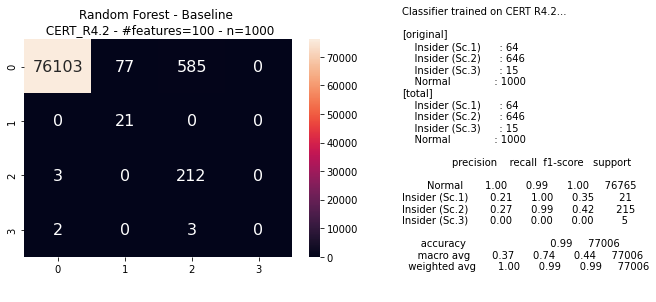

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



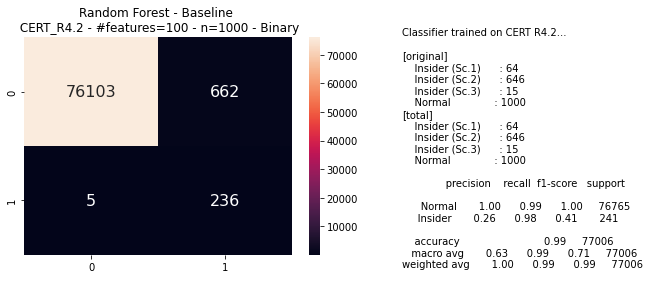

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



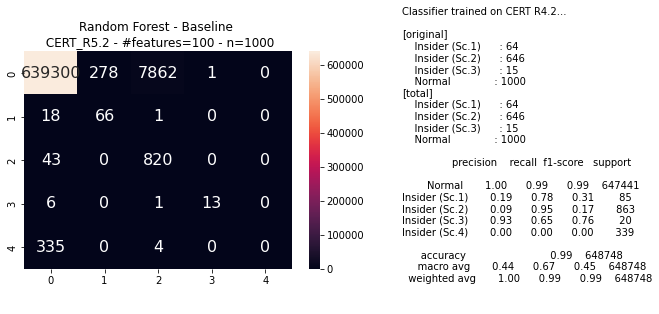

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



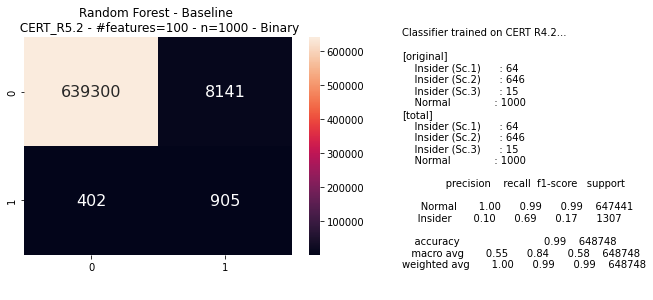

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



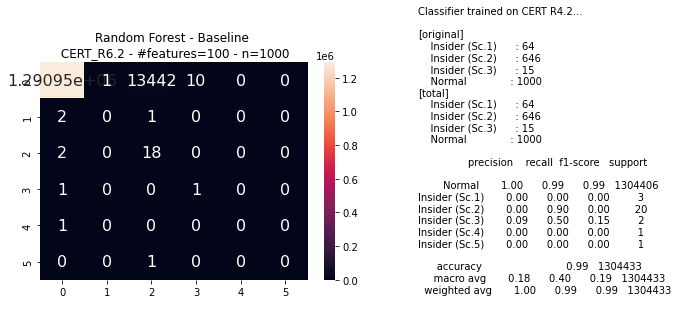

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



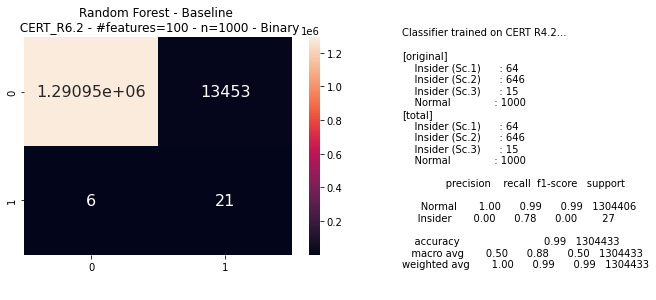

,0
classifier,Random Forest
strategy,Baseline
run,None
n_samples,1000
n_features,100
...,...
original_Insider (Sc.3)_traincount,15
total_Normal_traincount,1000
total_Insider (Sc.1)_traincount,64
total_Insider (Sc.2)_traincount,646


In [ ]:
n_samples = 1000

X_train_fea = X_train[:, feature_indicies]
X_test_fea = X_test[:, feature_indicies]
n_features = len(feature_indicies)

X_norm_train_subset, y_norm_train_subset = DataSampler(X_normal_train[:, feature_indicies], y_normal_train).get_batch(n_samples)
X_train_subset = tf.concat([X_norm_train_subset, X_anom_train[:, feature_indicies]], axis=0)
y_train_subset = tf.concat([y_norm_train_subset, y_anom_train], axis=0)

train_counts = class_counts(y=y_train_subset.numpy())
indices = tf.range(start=0, limit=tf.shape(X_train_subset)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)
X_train_subset = tf.gather(X_train_subset, shuffled_indices)
y_train_subset = tf.gather(y_train_subset, shuffled_indices)

rfc = RandomForestClassifier(n_estimators=10).fit(X_train_subset, y_train_subset)

y_pred = rfc.predict(X_test_fea)
create_metrics(classifier_name='Random Forest', strategy='Baseline', y_true=y_test, y_pred=y_pred, 
            img_dir=img_dir, train_counts=train_counts, n_features=n_features)

y_pred = rfc.predict(X_r52[:, r52_feature_indicies])
create_metrics(classifier_name='Random Forest', strategy='Baseline', test_dataset_name='CERT_R5.2',
               y_true=y_r52, y_pred=y_pred, img_dir=img_dir, train_counts=train_counts, n_features=n_features)


y_pred = rfc.predict(X_r62[:, r62_feature_indicies])
create_metrics(classifier_name='Random Forest', strategy='Baseline', test_dataset_name='CERT_R6.2',
               y_true=y_r62, y_pred=y_pred, img_dir=img_dir, train_counts=train_counts, n_features=n_features)

In [ ]:
# from sklearn.metrics import roc_auc_score
# insider_labels = [1,2,3,4,5]
# for label in insider_labels:
#     roc_auc_score(y_r62, rfc.predict_proba(X_r62[:, r62_feature_indicies]))

ValueError: ignored

## Classifiers w/ Augmented Data

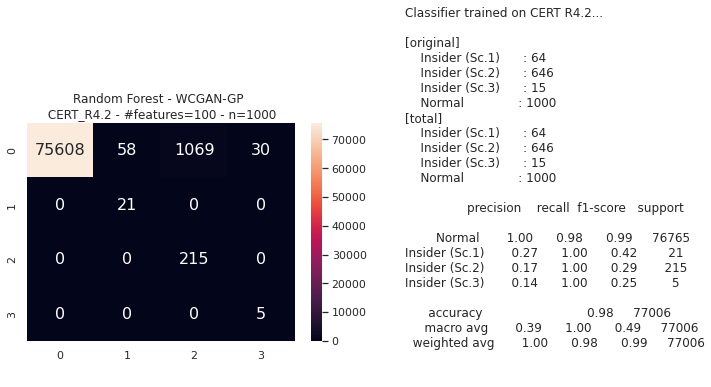

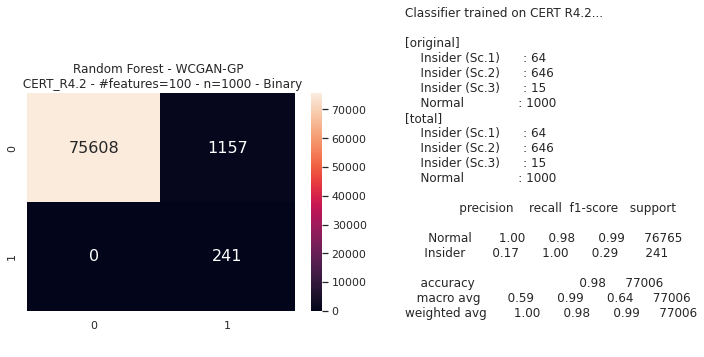

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



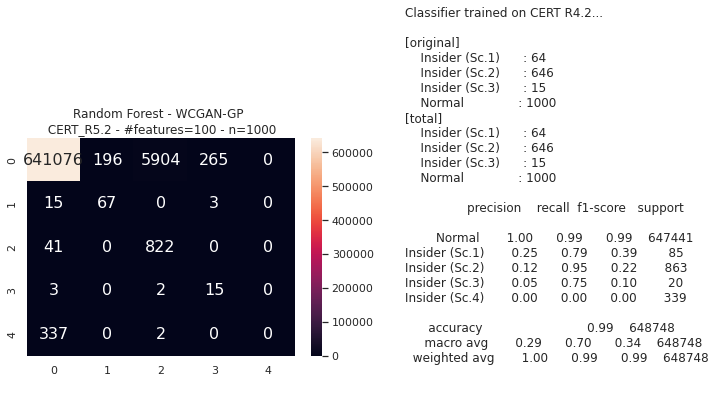

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



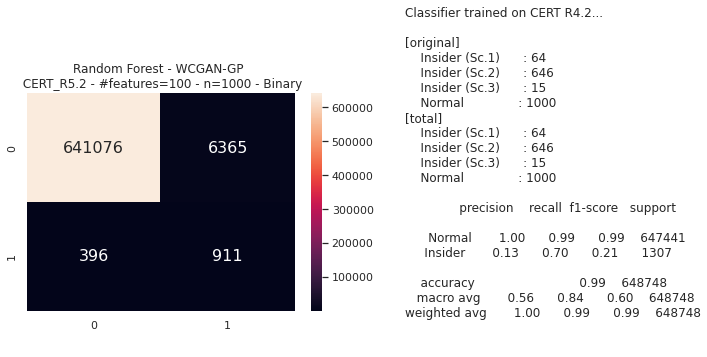

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



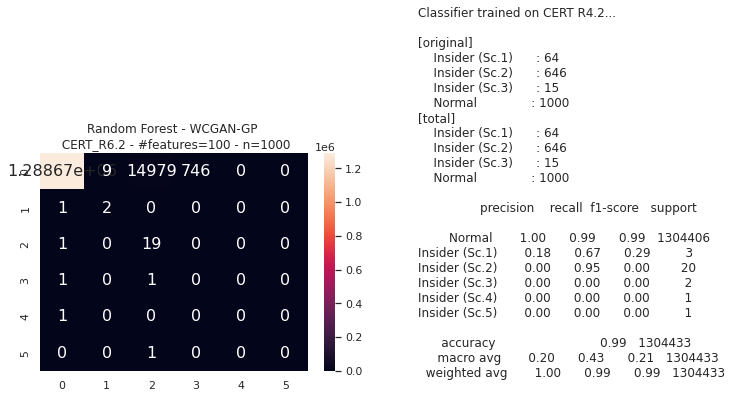

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



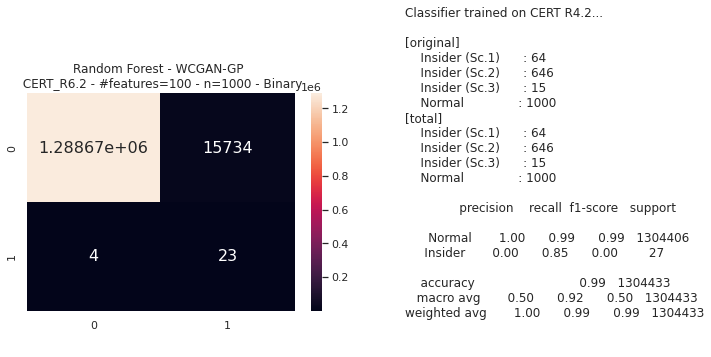

,0
classifier,Random Forest
strategy,WCGAN-GP
run,None
n_samples,1000
n_features,100
...,...
original_Insider (Sc.3)_traincount,15
total_Normal_traincount,1000
total_Insider (Sc.1)_traincount,64
total_Insider (Sc.2)_traincount,646


In [ ]:
X_gen_subsets, y_gen_subsets = [], []
for cls in [1, 2, 3]:
    cls_gen_count = n_samples - train_class_counts.get(cls)
    gen_X_insiders, z_labels_insiders = wcgan.generate(n_samples=cls_gen_count, sample_classes=[cls])
    X_gen_subsets.append(gen_X_insiders)
    y_gen_subsets.append(tf.cast(z_labels_insiders, dtype=tf.int32))
X_gen_insiders = tf.concat(X_gen_subsets, axis=0)
y_gen_insiders = tf.concat(y_gen_subsets, axis=0)

X_aug = tf.concat([X_train_subset, X_gen_insiders], axis=0)
y_aug = tf.concat([y_train_subset, y_gen_insiders], axis=0)

indices = tf.range(start=0, limit=tf.shape(X_aug)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)
X_aug = tf.gather(X_aug, shuffled_indices)
y_aug = tf.gather(y_aug, shuffled_indices)

rfc = RandomForestClassifier(n_estimators=10).fit(X_aug, y_aug)
y_pred = rfc.predict(X_test[:, feature_indicies])

create_metrics(classifier_name='Random Forest', strategy='WCGAN-GP', 
                y_true=y_test, y_pred=y_pred, img_dir=img_dir, train_counts=train_counts,
               n_features=n_features)

y_pred = rfc.predict(X_r52[:, r52_feature_indicies])
create_metrics(classifier_name='Random Forest', strategy='WCGAN-GP', test_dataset_name='CERT_R5.2', 
                y_true=y_r52, y_pred=y_pred, img_dir=img_dir, train_counts=train_counts,
               n_features=n_features)

y_pred = rfc.predict(X_r62[:, r62_feature_indicies])
create_metrics(classifier_name='Random Forest', strategy='WCGAN-GP', test_dataset_name='CERT_R6.2', 
                y_true=y_r62, y_pred=y_pred, img_dir=img_dir, train_counts=train_counts,
               n_features=n_features)

## Classification with SMOTE
(Synthetic Minority Over-sampling Technique)

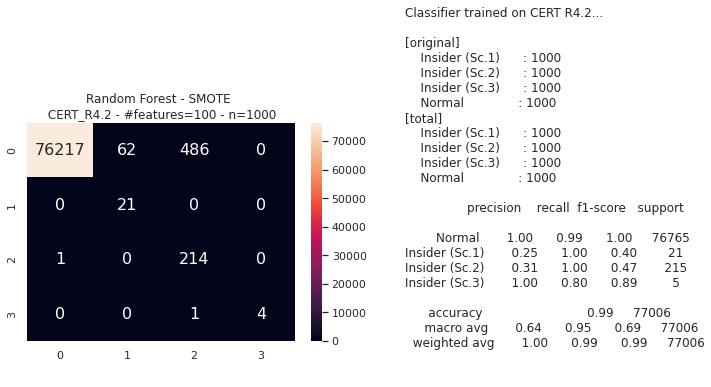

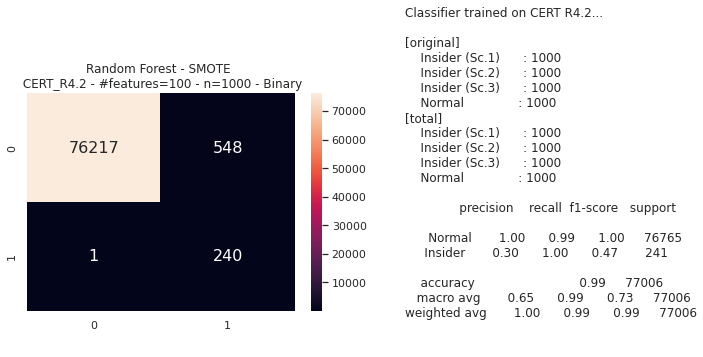

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



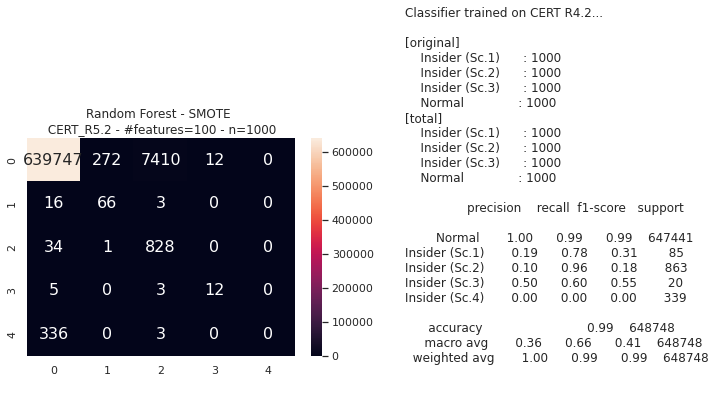

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



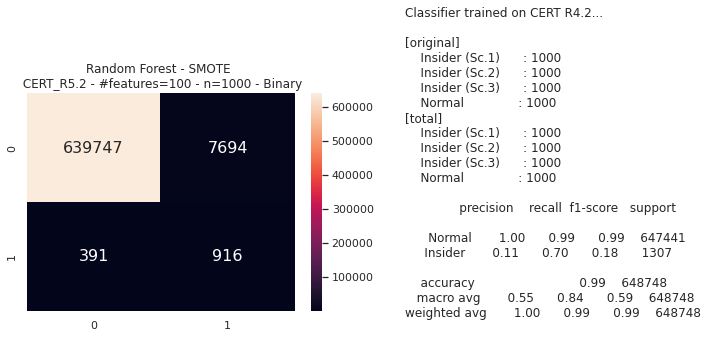

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



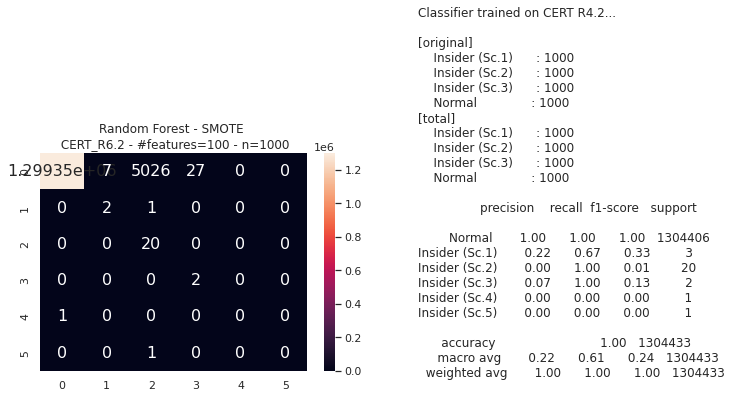

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



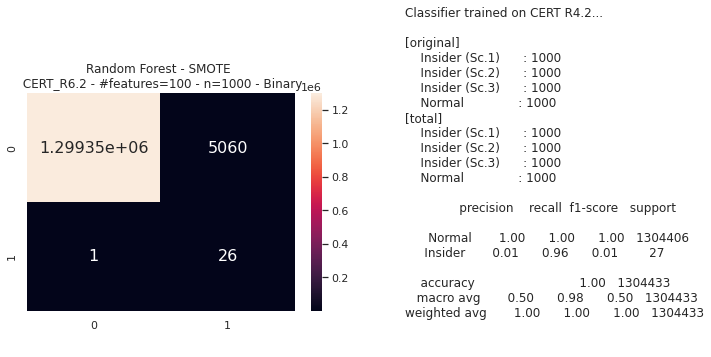

,0
classifier,Random Forest
strategy,SMOTE
run,None
n_samples,1000
n_features,100
...,...
original_Insider (Sc.1)_traincount,1000
total_Insider (Sc.2)_traincount,1000
total_Normal_traincount,1000
total_Insider (Sc.3)_traincount,1000


In [ ]:


sm = SMOTE(k_neighbors=5)
X_smote, y_smote = sm.fit_resample(X_train_subset, y_train_subset)

train_counts = class_counts(y=y_smote)
indices = tf.range(start=0, limit=tf.shape(X_smote)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)
X_smote = tf.gather(X_smote, shuffled_indices)
y_smote = tf.gather(y_smote, shuffled_indices)


rfc = RandomForestClassifier(n_estimators=10).fit(X_train_subset, y_train_subset)

y_pred = rfc.predict(X_test[:, feature_indicies])
create_metrics(classifier_name='Random Forest', strategy='SMOTE', 
            y_true=y_test, y_pred=y_pred, 
            img_dir=img_dir, train_counts=train_counts, n_features=n_features)

y_pred = rfc.predict(X_r52[:, r52_feature_indicies])
create_metrics(classifier_name='Random Forest', strategy='SMOTE', test_dataset_name='CERT_R5.2',
            y_true=y_r52, y_pred=y_pred, 
            img_dir=img_dir, train_counts=train_counts, n_features=n_features)

y_pred = rfc.predict(X_r62[:, r62_feature_indicies])
create_metrics(classifier_name='Random Forest', strategy='SMOTE', test_dataset_name='CERT_R6.2',
            y_true=y_r62, y_pred=y_pred, 
            img_dir=img_dir, train_counts=train_counts, n_features=n_features)




## SMOTE t-SNE Plot

class_counts: {0.0: 76765, 1.0: 21, 2.0: 215, 3.0: 5}
label_weights: {0: 1000, 1: 64, 2: 646, 3: 15}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



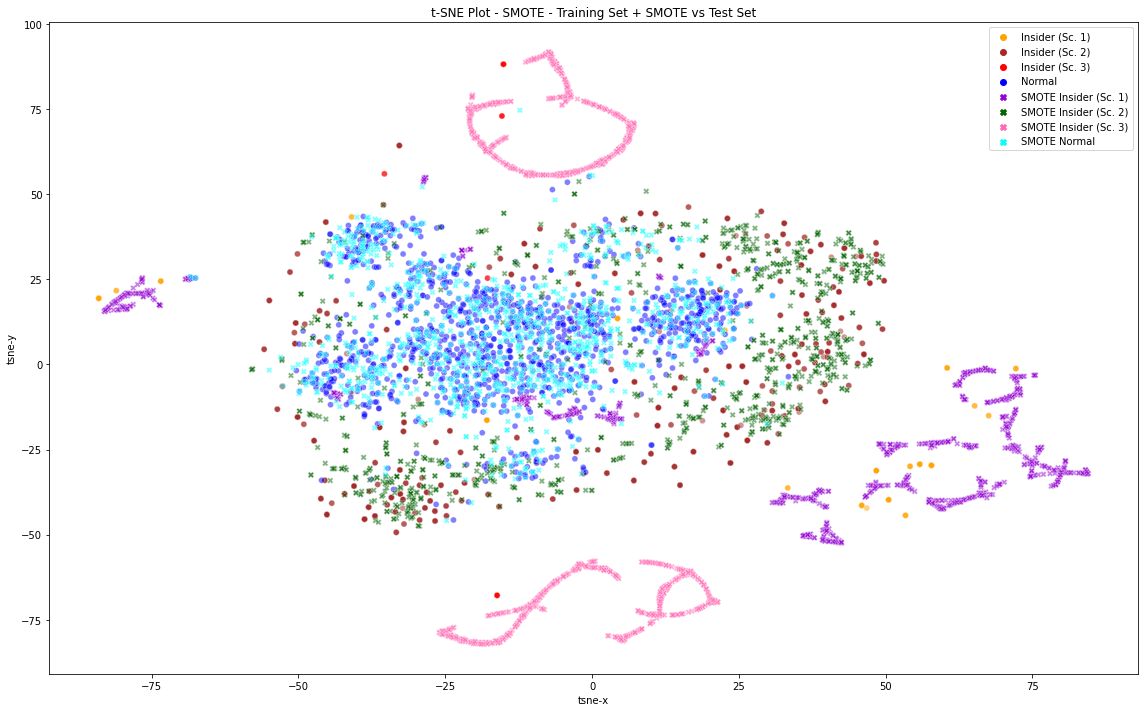

In [ ]:
tsne_dataset = DataSampler(X_test, y_test, label_weights={0: 1000, 1: 64, 2: 646, 3: 15})
X_test_subset, y_test_subset = tsne_dataset.get_batch(2000)

test_df = pd.DataFrame()
test_df['label'] = y_test_subset
test_df.replace({'label': {0: 'Normal', 1: 'Insider (Sc. 1)',
                2: 'Insider (Sc. 2)', 3: 'Insider (Sc. 3)'}}, inplace=True)

df = pd.DataFrame()
df['label'] = y_smote
df = df.append(test_df)
df.replace({'label': {0: 'SMOTE Normal', 1: 'SMOTE Insider (Sc. 1)', 
            2: 'SMOTE Insider (Sc. 2)', 3: 'SMOTE Insider (Sc. 3)'}}, inplace=True)

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
X_combined = tf.concat([X_smote, X_test_subset], axis=0)
y_combined = tf.concat([y_smote, y_test_subset], axis=0)

tsne_results = tsne.fit_transform(X_combined)

df['tsne-x'] = tsne_results[:,0]
df['tsne-y'] = tsne_results[:,1]

df = df.sort_values(by=['label'])
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-x", y="tsne-y",
    hue="label",
    style="label",
    palette=['orange', 'brown', 'red', 'blue', 'darkviolet', 'darkgreen', 'hotpink', 'cyan'],
    markers=['o', 'o', 'o', 'o', 'X', 'X', 'X', 'X'],
    data=df,
    alpha=0.5
)
plt.title(f't-SNE Plot - SMOTE - Training Set + SMOTE vs Test Set')
plt.legend(loc='upper right')
plt.tight_layout()
img_path = os.path.join(IMG_DIR, f'SMOTE-tSNE.png')
plt.savefig(img_path)
plt.show()


## Classifiers w/ only Generated Data

SVM - Only GAN Generated Samples
Classifier trained on...
[generated] {3: 500, 2: 500, 0: 500, 1: 500}
[total] {3: 500, 2: 500, 0: 500, 1: 500}

                 precision    recall  f1-score   support

         Normal       1.00      0.72      0.84     76765
Insider (Sc. 1)       0.01      0.71      0.02        21
Insider (Sc. 2)       0.01      0.57      0.01       215
Insider (Sc. 3)       0.02      0.60      0.04         5

       accuracy                           0.72     77006
      macro avg       0.26      0.65      0.23     77006
   weighted avg       1.00      0.72      0.83     77006



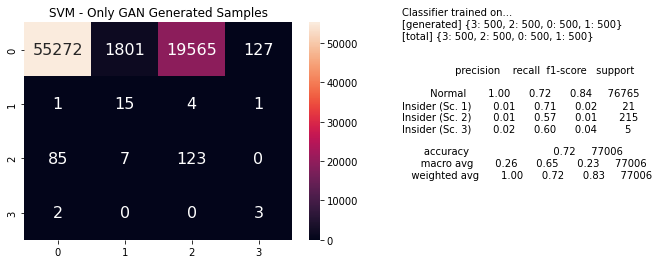

SVM - Only GAN Generated Samples - Binary
Classifier trained on...
[generated] {3: 500, 2: 500, 0: 500, 1: 500}
[total] {3: 500, 2: 500, 0: 500, 1: 500}

              precision    recall  f1-score   support

      Normal       1.00      0.72      0.84     76765
     Insider       0.01      0.63      0.01       241

    accuracy                           0.72     77006
   macro avg       0.50      0.68      0.43     77006
weighted avg       1.00      0.72      0.83     77006



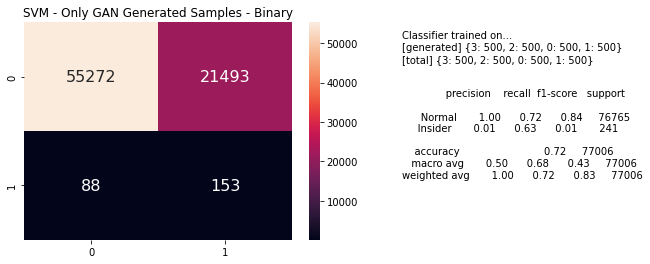

Random Forest - Only GAN Generated Samples
Classifier trained on...
[generated] {3: 500, 2: 500, 0: 500, 1: 500}
[total] {3: 500, 2: 500, 0: 500, 1: 500}

                 precision    recall  f1-score   support

         Normal       1.00      0.84      0.92     76765
Insider (Sc. 1)       0.07      0.81      0.13        21
Insider (Sc. 2)       0.02      0.87      0.03       215
Insider (Sc. 3)       0.02      0.80      0.03         5

       accuracy                           0.84     77006
      macro avg       0.28      0.83      0.28     77006
   weighted avg       1.00      0.84      0.91     77006



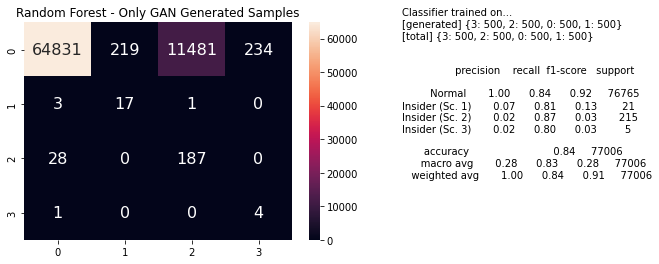

Random Forest - Only GAN Generated Samples - Binary
Classifier trained on...
[generated] {3: 500, 2: 500, 0: 500, 1: 500}
[total] {3: 500, 2: 500, 0: 500, 1: 500}

              precision    recall  f1-score   support

      Normal       1.00      0.84      0.92     76765
     Insider       0.02      0.87      0.03       241

    accuracy                           0.84     77006
   macro avg       0.51      0.86      0.47     77006
weighted avg       1.00      0.84      0.91     77006



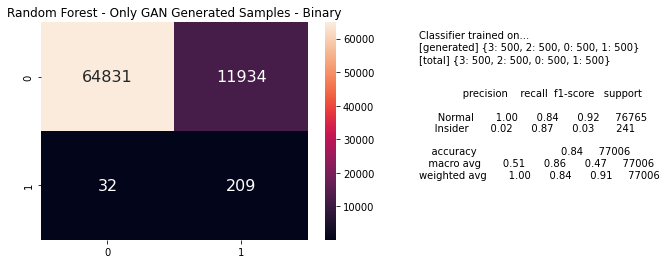

In [ ]:
gen_X_insiders, z_labels_insiders = wcgan.generate(n_samples=2000, sample_classes=[0,1,2,3])

indices = tf.range(start=0, limit=tf.shape(gen_X_insiders)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)
X_shuffled = tf.gather(gen_X_insiders, shuffled_indices)
y_shuffled = tf.gather(z_labels_insiders, shuffled_indices)

clf = svm.SVC(kernel='linear')
clf = clf.fit(X_shuffled, y_shuffled)
y_pred = clf.predict(X_test)

train_counts = class_counts(y_generated=y_shuffled.numpy())

create_metrics('SVM - Only WCGAN Generated Samples', y_true=y_test, y_pred=y_pred,
                train_counts=train_counts)

rfc = RandomForestClassifier(n_estimators=10).fit(X_shuffled, y_shuffled)
y_pred = rfc.predict(X_test)

create_metrics('Random Forest - Only WCGAN Generated Samples', y_true=y_test, y_pred=y_pred,
                train_counts=train_counts)

## CGAN vs WCGAN Classification


Loading weights from latest file: drive/MyDrive/CERT/model/cgan/multiclass_run/cgan_epoch010000.ckpt
class_counts: {0.0: 230292, 1.0: 64, 2.0: 646, 3.0: 15}
label_weights: {0: 1000, 1: 64, 2: 646, 3: 15}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



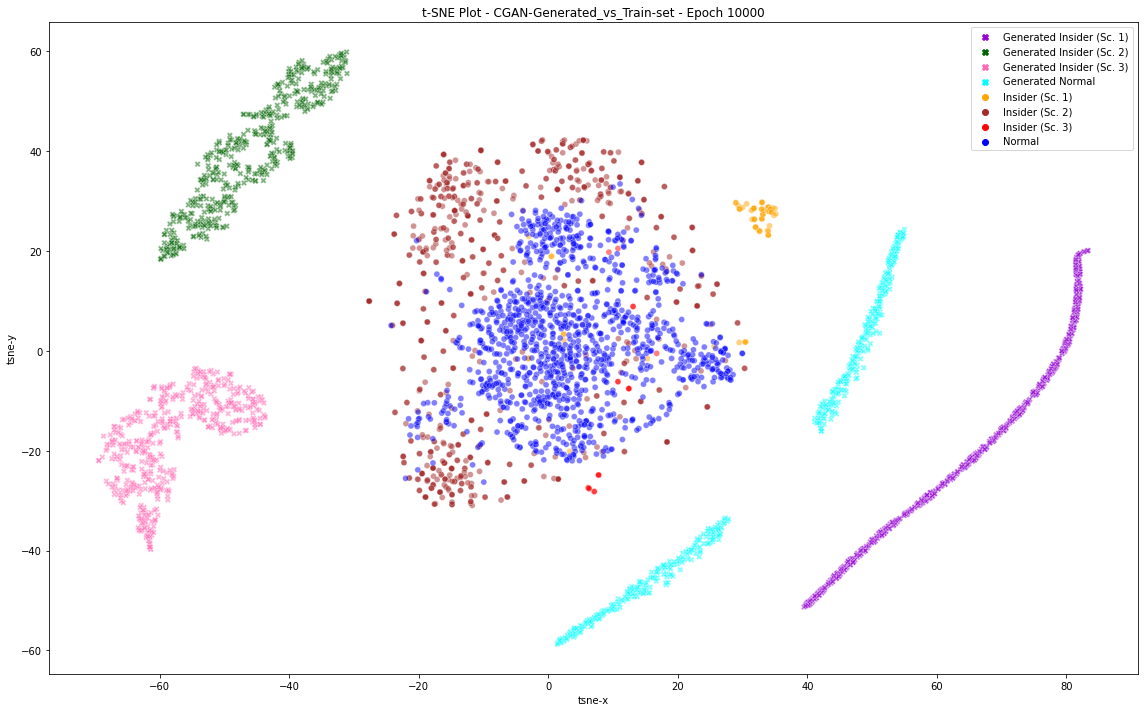

class_counts: {0.0: 76765, 1.0: 21, 2.0: 215, 3.0: 5}
label_weights: {0: 1000, 1: 64, 2: 646, 3: 15}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



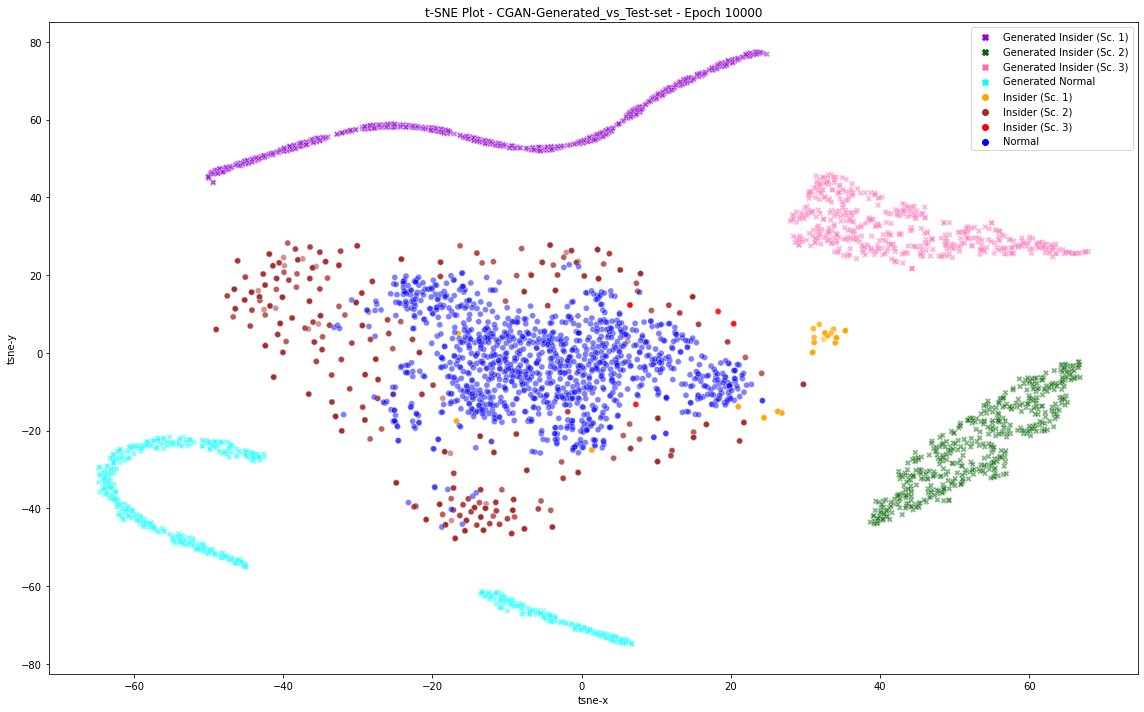

In [ ]:
epoch = 10000
cgan = ConditionalGAN(latent_dim=latent_dim, n_classes=num_classes)

# model_filepath = tf.train.latest_checkpoint(MODEL_DIR)
model_filepath = os.path.join(CGAN_MODEL_DIR, f'cgan_epoch{epoch:06d}.ckpt')
print(f'Loading weights from latest file: {model_filepath}')
cgan.load_weights(model_filepath).expect_partial()

# t-SNE plot of Generated data vs Training set
tsne_dataset = DataSampler(X_train, y_train, label_weights={0: 1000, 1: 64, 2: 646, 3: 15})
X_subset, y_subset = tsne_dataset.get_batch(2000)

plot_tsne = PlotTSNE(X_subset, y_subset, n_samples=2000, 
                     img_dir=CGAN_IMG_DIR, plot_name='CGAN-Generated_vs_Train-set')
plot_tsne.model = cgan
plot_tsne.on_epoch_end(epoch)
 
# t-SNE plot of Generated data vs Test set
tsne_dataset = DataSampler(X_test, y_test, label_weights={0: 1000, 1: 64, 2: 646, 3: 15})
X_subset, y_subset = tsne_dataset.get_batch(2000)

plot_tsne = PlotTSNE(X_subset, y_subset, n_samples=2000, 
                     img_dir=CGAN_IMG_DIR,  plot_name='CGAN-Generated_vs_Test-set')
plot_tsne.model = cgan
plot_tsne.on_epoch_end(epoch)

SVM - CGAN Generated Insiders
Classifier trained on...
[CERT_R4.2] {0: 1000, 2: 646, 1: 64, 3: 15}
[generated] {1: 333, 2: 333, 3: 333}
[total] {0: 1000, 2: 979, 1: 397, 3: 348}

                 precision    recall  f1-score   support

         Normal       1.00      0.96      0.98     76765
Insider (Sc. 1)       0.73      0.76      0.74        21
Insider (Sc. 2)       0.04      0.65      0.08       215
Insider (Sc. 3)       0.05      0.60      0.08         5

       accuracy                           0.96     77006
      macro avg       0.45      0.74      0.47     77006
   weighted avg       1.00      0.96      0.98     77006



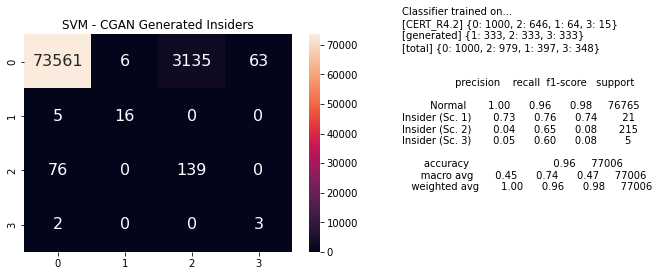

SVM - CGAN Generated Insiders - Binary
Classifier trained on...
[CERT_R4.2] {0: 1000, 2: 646, 1: 64, 3: 15}
[generated] {1: 333, 2: 333, 3: 333}
[total] {0: 1000, 2: 979, 1: 397, 3: 348}

              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98     76765
     Insider       0.05      0.66      0.09       241

    accuracy                           0.96     77006
   macro avg       0.52      0.81      0.53     77006
weighted avg       1.00      0.96      0.98     77006



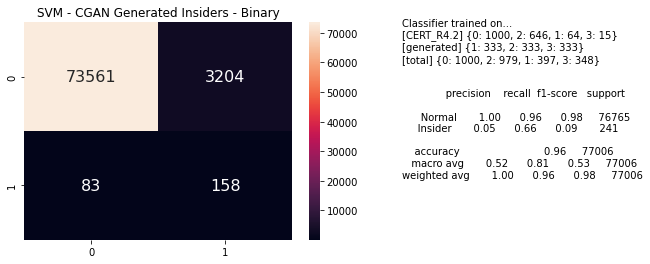

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest - CGAN Generated Insiders
Classifier trained on...
[CERT_R4.2] {0: 1000, 2: 646, 1: 64, 3: 15}
[generated] {1: 333, 2: 333, 3: 333}
[total] {0: 1000, 2: 979, 1: 397, 3: 348}

                 precision    recall  f1-score   support

         Normal       1.00      0.98      0.99     76765
Insider (Sc. 1)       0.17      0.90      0.29        21
Insider (Sc. 2)       0.15      1.00      0.26       215
Insider (Sc. 3)       0.00      0.00      0.00         5

       accuracy                           0.98     77006
      macro avg       0.33      0.72      0.38     77006
   weighted avg       1.00      0.98      0.99     77006



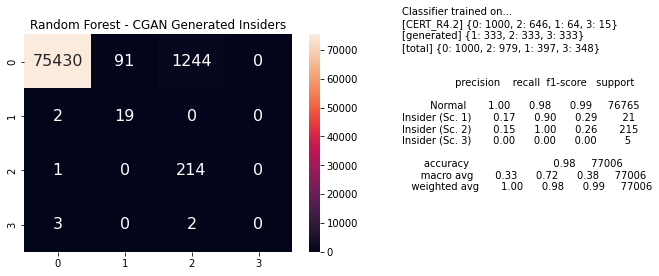

Random Forest - CGAN Generated Insiders - Binary
Classifier trained on...
[CERT_R4.2] {0: 1000, 2: 646, 1: 64, 3: 15}
[generated] {1: 333, 2: 333, 3: 333}
[total] {0: 1000, 2: 979, 1: 397, 3: 348}

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     76765
     Insider       0.15      0.98      0.26       241

    accuracy                           0.98     77006
   macro avg       0.57      0.98      0.63     77006
weighted avg       1.00      0.98      0.99     77006



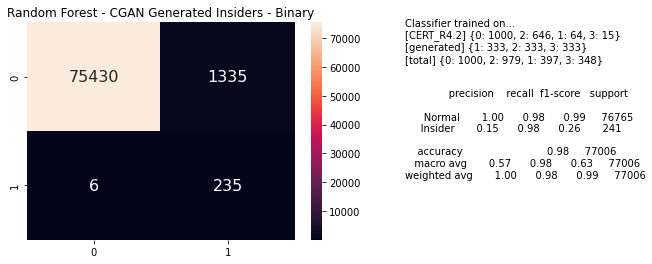

In [ ]:
n_samples = 1000


X_gen_insiders, y_gen_insiders = cgan.generate(n_samples=n_samples, sample_classes=[1,2,3])
y_gen_insiders = tf.cast(y_gen_insiders, dtype=tf.int32)


X_aug = tf.concat([X_train_subset, X_gen_insiders], axis=0)
y_aug = tf.concat([y_train_subset, y_gen_insiders], axis=0)

indices = tf.range(start=0, limit=tf.shape(X_aug)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)
X_aug = tf.gather(X_aug, shuffled_indices)
y_aug = tf.gather(y_aug, shuffled_indices)

clf = svm.SVC(kernel='linear')
clf = clf.fit(X_aug, y_aug)
y_pred = clf.predict(X_test)

train_counts = class_counts(y=y_train_subset.numpy(), y_generated=y_gen_insiders.numpy())
create_metrics('SVM - CGAN Generated Insiders', 
               y_true=y_test, y_pred=y_pred, 
               img_dir=CGAN_IMG_DIR, train_counts=train_counts)

rfc = RandomForestClassifier(n_estimators=10).fit(X_aug, y_aug)
y_pred = rfc.predict(X_test)

create_metrics('Random Forest - CGAN Generated Insiders', 
               y_true=y_test, y_pred=y_pred, 
               img_dir=CGAN_IMG_DIR, train_counts=train_counts)

SVM - WCGAN Generated Insiders
Classifier trained on...
[CERT_R4.2] {0: 1000, 2: 646, 1: 64, 3: 15}
[generated] {1: 333, 2: 333, 3: 333}
[total] {0: 1000, 2: 979, 1: 397, 3: 348}

                 precision    recall  f1-score   support

         Normal       1.00      0.95      0.97     76765
Insider (Sc. 1)       0.11      0.71      0.19        21
Insider (Sc. 2)       0.04      0.66      0.07       215
Insider (Sc. 3)       0.03      0.60      0.06         5

       accuracy                           0.95     77006
      macro avg       0.29      0.73      0.32     77006
   weighted avg       1.00      0.95      0.97     77006



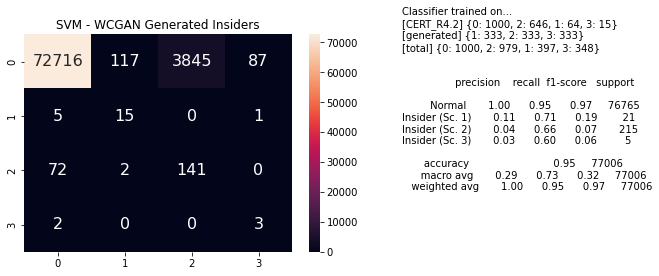

SVM - WCGAN Generated Insiders - Binary
Classifier trained on...
[CERT_R4.2] {0: 1000, 2: 646, 1: 64, 3: 15}
[generated] {1: 333, 2: 333, 3: 333}
[total] {0: 1000, 2: 979, 1: 397, 3: 348}

              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97     76765
     Insider       0.04      0.67      0.07       241

    accuracy                           0.95     77006
   macro avg       0.52      0.81      0.52     77006
weighted avg       1.00      0.95      0.97     77006



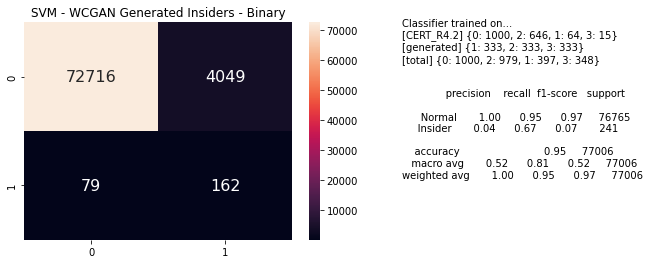

Random Forest - WCGAN-GP Generated Insiders
Classifier trained on...
[CERT_R4.2] {0: 1000, 2: 646, 1: 64, 3: 15}
[generated] {1: 333, 2: 333, 3: 333}
[total] {0: 1000, 2: 979, 1: 397, 3: 348}

                 precision    recall  f1-score   support

         Normal       1.00      0.98      0.99     76765
Insider (Sc. 1)       0.26      1.00      0.41        21
Insider (Sc. 2)       0.15      0.99      0.26       215
Insider (Sc. 3)       0.29      1.00      0.45         5

       accuracy                           0.98     77006
      macro avg       0.43      0.99      0.53     77006
   weighted avg       1.00      0.98      0.99     77006



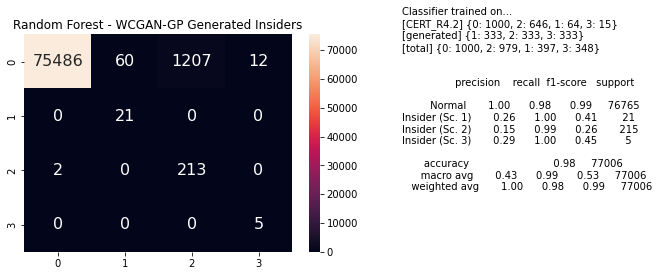

Random Forest - WCGAN-GP Generated Insiders - Binary
Classifier trained on...
[CERT_R4.2] {0: 1000, 2: 646, 1: 64, 3: 15}
[generated] {1: 333, 2: 333, 3: 333}
[total] {0: 1000, 2: 979, 1: 397, 3: 348}

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     76765
     Insider       0.16      0.99      0.27       241

    accuracy                           0.98     77006
   macro avg       0.58      0.99      0.63     77006
weighted avg       1.00      0.98      0.99     77006



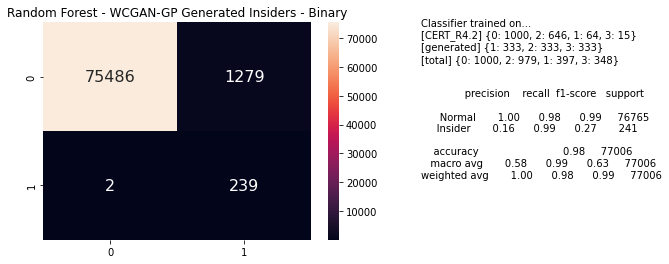

In [ ]:

X_gen_insiders, y_gen_insiders = wcgan.generate(n_samples=n_samples, sample_classes=[1,2,3])
y_gen_insiders = tf.cast(y_gen_insiders, dtype=tf.int32)


X_aug = tf.concat([X_train_subset, X_gen_insiders], axis=0)
y_aug = tf.concat([y_train_subset, y_gen_insiders], axis=0)

indices = tf.range(start=0, limit=tf.shape(X_aug)[0], dtype=tf.int32)
shuffled_indices = tf.random.shuffle(indices)
X_aug = tf.gather(X_aug, shuffled_indices)
y_aug = tf.gather(y_aug, shuffled_indices)

clf = svm.SVC(kernel='linear')
clf = clf.fit(X_aug, y_aug)
y_pred = clf.predict(X_test)

train_counts = class_counts(y=y_train_subset.numpy(), y_generated=y_gen_insiders.numpy())
create_metrics('SVM - WCGAN Generated Insiders', 
               y_true=y_test, y_pred=y_pred, 
               img_dir=IMG_DIR, train_counts=train_counts)

rfc = RandomForestClassifier(n_estimators=10).fit(X_aug, y_aug)
y_pred = rfc.predict(X_test)

create_metrics('Random Forest - WCGAN-GP Generated Insiders', 
               y_true=y_test, y_pred=y_pred, 
               img_dir=IMG_DIR, train_counts=train_counts)

# Experiments

## Collect Results for multiple runs

In [ ]:
import tensorflow as tf
def train_wcgan(X_train, y_train, img_dir, model_dir, epochs, 
                n_features, n_classes, arch, batch_size=16):

    wcgan = WCGAN(critic_steps=5, gp_weight=10.0, n_classes=n_classes, 
                  n_features=n_features, arch=arch)
    wcgan.compile(
        c_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.9),
        g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.9),
        c_loss_fn=critic_loss,
        g_loss_fn=generator_loss
    )
    plot_model(wcgan.critic, to_file=os.path.join(model_dir, f'{n_features}fea_critic_{arch}_arch.png'), 
               show_shapes=True, show_layer_names=True)
    plot_model(wcgan.generator, to_file=os.path.join(model_dir, f'{n_features}fea_generator_{arch}_arch.png'), 
               show_shapes=True, show_layer_names=True)

    dataset = BalancedDataGenerator(X_train, y_train, 
                                    label_weights={0: 6/16, 1: 4/16, 2: 5/16, 3: 1/16},
                                    dim=(n_features,), batch_size=batch_size)

    checkpoint_path = os.path.join(model_dir, f'wcgan_{arch}_{n_features}fea_' + 'epoch{epoch:06d}.ckpt')
    checkpoint = ModelCheckpoint(checkpoint_path, verbose=1,
                                save_weights_only=True, period=1000)

    tsne_dataset = DataSampler(X_train, y_train, label_weights={0: 6/16, 1: 4/16, 2: 6/16, 3: 1/16})
    X_subset, y_subset = tsne_dataset.get_batch(2000)

    plot_tsne = PlotTSNE(X_subset, y_subset, img_dir=img_dir, 
                         plot_name=f'WCGAN-GP - {arch} - Run {i} - {n_features} Features', 
                         n_samples=480, period=1000)
    wcgan.save_weights(checkpoint_path.format(epoch=0))
    history = wcgan.fit(dataset, epochs=epochs, callbacks=[checkpoint, plot_tsne], verbose=0)

    plt.show()
    plt.plot(history.history['g_loss'])
    plt.plot(history.history['c_loss'])

    plt.title(f'WCGAN-GP Loss - {arch} - Run {i} - # Features {n_features}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Gen. Loss', 'Critic Loss',])
    plt.savefig(os.path.join(img_dir, f'wcgan-train-history-{arch}-run{i}-{n_features}fea.png'))
    plt.show()
    return wcgan

def init_svm():
    return svm.SVC(kernel='linear')
def init_rf():
    return RandomForestClassifier(n_estimators=10)
def init_lr():
    return LogisticRegression(C=0.1)
def init_xgboost():
    return XGBClassifier()

def run_classifications(run_id, n_samples, feature_indicies, n_classes,
                        model_dir, data_file, model_configs):
    (r42_indicies, r52_indicies, r62_indicies) = feature_indicies
    n_features = len(r42_indicies)

    run_dfs = []
    img_dir = os.path.join(model_dir, 'img')
    n_img_dir =  os.path.join(img_dir, f'{n_samples}_sample_confmats')
    if not os.path.isdir(n_img_dir):
        os.mkdir(n_img_dir)

    # Load data split from file
    with open(data_pkl_path, 'rb') as f:
        (X_train, X_test, y_train, y_test) = pickle.load(f)
    
    X_train = X_train[:, r42_indicies]
    X_test = X_test[:, r42_indicies]

    # Prepare dataset for classifications
    X_normal_train, y_normal_train = X_train[y_train == 0], y_train[y_train == 0]
    X_normal_test, y_normal_test = X_test[y_test == 0], y_test[y_test == 0]

    X_anom_train, y_anom_train = X_train[y_train > 0], y_train[y_train > 0]
    X_anom_test, y_anom_test = X_test[y_test > 0], y_test[y_test > 0]

    # Baseline Dataset
    X_norm_train_subset, y_norm_train_subset = DataSampler(X_normal_train, y_normal_train).get_batch(n_samples)
    X_train_subset = tf.concat([X_norm_train_subset, X_anom_train], axis=0)
    y_train_subset = tf.concat([y_norm_train_subset, y_anom_train], axis=0)
    
    indices = tf.range(start=0, limit=tf.shape(X_train_subset)[0], dtype=tf.int32)
    shuffled_indices = tf.random.shuffle(indices)
    X_train_subset = tf.gather(X_train_subset, shuffled_indices)
    y_train_subset = tf.gather(y_train_subset, shuffled_indices)

    # WCGAN-GP Augmented Datasets
    gan_strategies = []
    for conf in model_configs:
        checkpoint_path = conf['checkpoint_path']
        arch = conf['arch']
        model_name = conf['model_name']

        # Load model weights from checkpoint
        wcgan = WCGAN(n_classes=n_classes, n_features=n_features, arch=arch)
        print(f'Loading {arch} WCGAN weights from file: {checkpoint_path}')
        wcgan.load_weights(checkpoint_path).expect_partial()
        X_gen_subsets, y_gen_subsets = [], []
        for cls in [1, 2, 3]:
            cls_gen_count = n_samples - train_class_counts.get(cls)
            gen_X_insiders, z_labels_insiders = wcgan.generate(n_samples=cls_gen_count, sample_classes=[cls])
            X_gen_subsets.append(gen_X_insiders)
            y_gen_subsets.append(tf.cast(z_labels_insiders, dtype=tf.int32))

        X_gen_insiders = tf.concat(X_gen_subsets, axis=0)
        y_gen_insiders = tf.concat(y_gen_subsets, axis=0)

        X_aug = tf.concat([X_train_subset, X_gen_insiders], axis=0)
        y_aug = tf.concat([y_train_subset, y_gen_insiders], axis=0)

        indices = tf.range(start=0, limit=tf.shape(X_aug)[0], dtype=tf.int32)
        shuffled_indices = tf.random.shuffle(indices)
        X_aug = tf.gather(X_aug, shuffled_indices)
        y_aug = tf.gather(y_aug, shuffled_indices)
        gan_strategies.append((f'{model_name} - {arch}', X_aug, y_aug))


    # SMOTE Augmented Dataset
    sm = SMOTE(k_neighbors=5)
    X_smote, y_smote = sm.fit_resample(X_train_subset, y_train_subset)

    indices = tf.range(start=0, limit=tf.shape(X_smote)[0], dtype=tf.int32)
    shuffled_indices = tf.random.shuffle(indices)
    X_smote = tf.gather(X_smote, shuffled_indices)
    y_smote = tf.gather(y_smote, shuffled_indices)

    classifiers = [('Random Forest', init_rf),  
                   ('XGBoost', init_xgboost),
                   ('Logistic Regression', init_lr),
                   ('SVM', init_svm),]
    strategies = [('Baseline', X_train_subset, y_train_subset),
                  ('SMOTE', X_smote, y_smote),
                  *gan_strategies]

    clf_strats = itertools.product(classifiers, strategies)
    for ((clf_name, clf_init), (strategy, X_train_strategy, y_train_strategy)) in clf_strats:
        start_time = time.time()
        train_counts = class_counts(y=y_train_strategy.numpy())
        clf = clf_init()
        clf = clf.fit(X_train_strategy, y_train_strategy)
        train_duration = pd.Series([time.time() - start_time], name='train_duration')
        
        y_pred = clf.predict(X_test)
        run_df = create_metrics(classifier_name=clf_name, strategy=strategy, 
                                test_dataset_name='CERT_R4.2',
                                y_true=y_test, y_pred=y_pred, 
                                run=run_id, n_features=n_features, 
                                img_dir=n_img_dir, train_counts=train_counts)
        
        run_df = run_df.append(train_duration)
        run_dfs.append(run_df)

        y_pred = clf.predict(X_r52[:, r52_indicies])
        run_df = create_metrics(classifier_name=clf_name, strategy=strategy,
                                test_dataset_name='CERT_R5.2',
                                y_true=y_r52, y_pred=y_pred, 
                                run=run_id, n_features=n_features, 
                                img_dir=n_img_dir, train_counts=train_counts)
        
        run_df = run_df.append(train_duration)
        run_dfs.append(run_df)

        y_pred = clf.predict(X_r62[:, r62_indicies])
        run_df = create_metrics(classifier_name=clf_name, strategy=strategy,
                                test_dataset_name='CERT_R6.2',
                                y_true=y_r62, y_pred=y_pred, 
                                run=run_id, n_features=n_features, 
                                img_dir=n_img_dir, train_counts=train_counts)
        
        run_df = run_df.append(train_duration)
        run_dfs.append(run_df)

    return run_dfs

sns.set_theme()

feature_sets = [(top100_feature_indicies, r52_top100_feature_indicies, r62_top100_feature_indicies), ]
                #(all_feature_indicies, r52_all_feature_indicies, r62_all_feature_indicies)]
architectures = ['DeepV1',] #'ShallowV1', 
# n_clf_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 40000, 60000, 80000, 100000]#, 120000, 140000, 160000, 180000, 200000]
n_clf_list = [2000, 4000, 6000, 8000, 10000]
epochs = 5000
n_classes = 4
run_metrics_dfs = []
use_completed_clfs = True
for i in range(0, 10):
    model_dir = 'drive/MyDrive/CERT/model/wcgan'
    dataset_dir = os.path.join(model_dir, 'cert_r4.2')
    run_name = f'run{i}'
    run_model_dir = os.path.join(dataset_dir, run_name)
    run_img_dir = os.path.join(run_model_dir, 'img')
    Path(run_img_dir).mkdir(parents=True, exist_ok=True)

    data_pkl_path = os.path.join(run_model_dir, 'cert_r42_train_test_split.pickle')
    if os.path.isfile(data_pkl_path):
        with open(data_pkl_path, 'rb') as f:
            (X_train, X_test, y_train, y_test) = pickle.load(f)
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            data, labels, test_size=0.25, stratify=labels
        )
        with open(data_pkl_path, 'wb') as f:
            pickle.dump((X_train, X_test, y_train, y_test), f)
    for (r42_indicies, r52_indicies, r62_indicies) in feature_sets:
        n_features = len(r42_indicies)

        model_configs = []
        for arch in architectures:
            checkpoint_path = os.path.join(run_model_dir, f'wcgan_{arch}_{n_features}fea_epoch{epochs:06d}.ckpt')
            model_configs.append({'model_name': 'WCGAN-GP', 'arch': arch, 'checkpoint_path': checkpoint_path})
            if not os.path.isfile(checkpoint_path + '.index'):
                wcgan = train_wcgan(X_train[:, r42_indicies], y_train,  
                                    img_dir=run_img_dir, 
                                    model_dir=run_model_dir,
                                    epochs=epochs + 1,
                                    n_features=n_features,
                                    n_classes=n_classes,
                                    arch=arch)

        n_list = n_clf_list
        csv_path = os.path.join(run_model_dir, f'run{i}_{n_features}fea_cert_r4.2_wcgan_results.csv')
        if use_completed_clfs and os.path.isfile(csv_path):
            prev_run_df = pd.read_csv(csv_path, header=0)
            prev_ns = list(prev_run_df['n_samples'].unique())
            n_list = list(set(n_list) - set(prev_ns))
            if len(n_list) < 1:
                print(f'Classifications already completed - Skipping run {i} - {n_features} features')
                continue
        
        run_dfs = [run_classifications(
                run_id=i, 
                model_dir=run_model_dir, 
                data_file=data_pkl_path,
                model_configs=model_configs,
                n_samples=n,
                feature_indicies=(r42_indicies, r52_indicies, r62_indicies),
                n_classes=n_classes
            ) for n in n_list]

        flattened_run_dfs = [i for sublist in run_dfs for i in sublist]
        run_df = pd.concat(flattened_run_dfs, axis=1).T

        if use_completed_clfs and os.path.isfile(csv_path):
            run_df = pd.concat([prev_run_df, run_df])
        run_df.to_csv(csv_path, index=False)
        run_metrics_dfs.append(run_df)


Output hidden; open in https://colab.research.google.com to view.

## Load & Aggregate results

In [5]:

filenames = glob.glob(os.path.join('drive/MyDrive/CERT/model/wcgan/cert_r4.2', 
                                   'run*',
                                   "run*_cert_r4.2_wcgan_results.csv"))

li = [pd.read_csv(fname, index_col=None, header=0)for fname in filenames]
results = pd.concat(li, axis=0, ignore_index=True)
# results.to_csv(os.path.join(MODEL_DIR, 'cert_r4.2_wcgan_results_allruns.csv'), index=False)
results['classifier'] = results.classifier.replace('Linear Regression', 'Logistic Regression')
results

,classifier,strategy,run,n_samples,n_features,test_dataset_name,precision_Normal,recall_Normal,f1-score_Normal,support_Normal,...,recall_Insider (Sc.5),f1-score_Insider (Sc.5),support_Insider (Sc.5),Insider (Sc.5)_multibin_tp,Insider (Sc.5)_multibin_tn,Insider (Sc.5)_multibin_fp,Insider (Sc.5)_multibin_fn,Insider (Sc.5)_multibin_precision,Insider (Sc.5)_multibin_recall,Insider (Sc.5)_multibin_f1_score
0,Random Forest,Baseline,0,2000,100,CERT_R4.2,0.999921,0.994776,0.997342,76765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Random Forest,Baseline,0,2000,100,CERT_R5.2,0.999325,0.978858,0.988986,647441.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Random Forest,Baseline,0,2000,100,CERT_R6.2,0.999996,0.997078,0.998535,1304406.0,...,0.0,0.0,1.0,1.0,1300615.0,0.0,0.0,1.0,1.0,1.0
3,Random Forest,SMOTE,0,2000,100,CERT_R4.2,0.999908,0.988732,0.994288,76765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Random Forest,SMOTE,0,2000,100,CERT_R5.2,0.999335,0.987024,0.993142,647441.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,SVM,SMOTE,9,10000,100,CERT_R5.2,0.998708,0.868141,0.928859,647441.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1796,SVM,SMOTE,9,10000,100,CERT_R6.2,0.999990,0.951883,0.975343,1304406.0,...,0.0,0.0,1.0,1.0,1241655.0,0.0,0.0,1.0,1.0,1.0
1797,SVM,WCGAN-GP - DeepV1,9,10000,100,CERT_R4.2,0.998328,0.987937,0.993106,76765.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1798,SVM,WCGAN-GP - DeepV1,9,10000,100,CERT_R5.2,0.998962,0.985518,0.992195,647441.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Generate LaTex Result Tables

In [9]:
classifiers = ['Random Forest', 'Logistic Regression', 'SVM', 'XGBoost']
n_samples = 10000
measures = [('multibin_precision', 'Binary Precision'), ('multibin_recall', 'Binary Recall'), ('multibin_f1_score', 'Binary F1-Score')]
multiclass_classes = ['Normal', 'Insider (Sc.1)', 'Insider (Sc.2)', 'Insider (Sc.3)', 'Insider (Sc.4)', 'Insider (Sc.5)']
val_vars = {f"{cls}_{old_measure}": f"{measure}_{cls}" for ((old_measure, measure), cls) in itertools.product(measures, multiclass_classes)}
display(val_vars)
results = results.rename(columns=val_vars)
n_feature_sets = [100] #, 504]
# Generate LaTex tables for each dataset and # features combo
measures = ['Binary Precision', 'Binary Recall', 'Binary F1-Score']
for n_features in n_feature_sets:
    for (dataset, cls_index) in [("CERT_R4.2", 4), ("CERT_R5.2", 5), ("CERT_R6.2", 6)]:
        classes = multiclass_classes[:cls_index]
        cols = [f"{measure}_{cls}" for (measure, cls) in itertools.product(measures, classes)]
        dataset_df = results[(results['test_dataset_name'] == dataset) & (results['n_samples'] == n_samples) & (results['n_features'] == n_features)]
        dataset_df = dataset_df[['strategy', 'classifier'] + cols]
        dataset_df = dataset_df.groupby(['strategy', 'classifier']).mean()
        display(dataset_df)
        dataset = dataset.replace('_', ' ')
        dataset_df.columns = dataset_df.columns.str.replace('Binary ', '').str.replace('Precision', 'P').str.replace('Recall', 'R').str.replace('F1-Score', 'F1')
        dataset_df = dataset_df.rename(columns=lambda x: (x.split("_")[1], x.split("_")[0]))
        dataset_df = dataset_df.reindex(sorted(dataset_df.columns), axis=1)
        dataset_df.columns = pd.MultiIndex.from_tuples(dataset_df.columns, names=['Class','Measure'])
        # Move normal measures to front of dataframe so it stays consistent across all datasets
        dataset_df.insert(0, ('Normal', 'R'), dataset_df.pop(('Normal', 'R')))
        dataset_df.insert(0, ('Normal', 'P'), dataset_df.pop(('Normal', 'P')))
        dataset_df.insert(0, ('Normal', 'F1'), dataset_df.pop(('Normal', 'F1')))

        print(dataset_df.columns)
        with open(f'{dataset}_{n_features}fea_results.tex', 'w') as tf:
            tf.write("\\begin{table}\n\\caption{" + f'{dataset}\ -\ {n_features}\ features\ -\ Insider\ Threat\ Detection\ Data\ Augmentation\ Strategy\ Classification\ Results' +"}\n\\vspace*{5mm}\n\\centering\small\n\\begin{adjustbox}{width=1\\textwidth}")
            tf.write(dataset_df.to_latex(index=True, float_format="%.3f",
                    multirow=True,
                    multicolumn=True,
                    multicolumn_format='c',
                    ))
            tf.write("\\end{adjustbox}\n\\label{tab:" + f'{dataset}-{n_features}fea-results' + "}\n\\end{table}")

# Generate macro averaged LaTex tables for 100 and 504 features
for n_features in n_feature_sets:
    dset_dfs = []
    for (dataset, cls_index) in [("CERT_R4.2", 4), ("CERT_R5.2", 5), ("CERT_R6.2", 6)]:
        classes = multiclass_classes[:cls_index]
        dataset_df = results[(results['test_dataset_name'] == dataset) & (results['n_samples'] == n_samples) & (results['n_features'] == n_features)]
        for measure in measures:
            cols = [f"{measure}_{cls}" for cls in classes]
            dataset_df[measure] = dataset_df[cols].mean(axis=1)
        
        dataset_df = dataset_df[['strategy', 'classifier'] + measures]
        dataset_df = dataset_df.groupby(['strategy', 'classifier']).mean()
        display(dataset_df)
        dataset = dataset.replace('_', ' ')
        dataset_df.columns = dataset_df.columns.str.replace('Binary ', '').str.replace('Precision', 'P').str.replace('Recall', 'R').str.replace('F1-Score', 'F1')
        display(dataset_df.columns)
        dataset_df = dataset_df.rename(columns=lambda x: (dataset, x))
        dataset_df = dataset_df.reindex(sorted(dataset_df.columns), axis=1)
        dataset_df.columns = pd.MultiIndex.from_tuples(dataset_df.columns, names=['Dataset','Measure'])
        dset_dfs.append(dataset_df)
    summary_df = pd.concat(dset_dfs, axis=1)
    display(summary_df)
    with open(f'macro_avg_{n_features}fea_classifier_results.tex', 'w') as tf:
        tf.write("\\begin{table}\n\\caption{" + f'Macro Averaged Summary\ -\ {n_features}\ features\ -\ Insider\ Threat\ Detection\ Data\ Augmentation\ Strategy\ Classification\ Results' +"}\n\\vspace*{5mm}\n\\centering\small\n\\begin{adjustbox}{width=1\\textwidth}")
        tf.write(summary_df.to_latex(index=True, float_format="%.3f",
                multirow=True,
                multicolumn=True,
                multicolumn_format='c',
                ))
        tf.write("\\end{adjustbox}\n\\label{tab:" + f'macro-avg-{n_features}fea-results' + "}\n\\end{table}")

{'Insider (Sc.1)_multibin_f1_score': 'Binary F1-Score_Insider (Sc.1)',
 'Insider (Sc.1)_multibin_precision': 'Binary Precision_Insider (Sc.1)',
 'Insider (Sc.1)_multibin_recall': 'Binary Recall_Insider (Sc.1)',
 'Insider (Sc.2)_multibin_f1_score': 'Binary F1-Score_Insider (Sc.2)',
 'Insider (Sc.2)_multibin_precision': 'Binary Precision_Insider (Sc.2)',
 'Insider (Sc.2)_multibin_recall': 'Binary Recall_Insider (Sc.2)',
 'Insider (Sc.3)_multibin_f1_score': 'Binary F1-Score_Insider (Sc.3)',
 'Insider (Sc.3)_multibin_precision': 'Binary Precision_Insider (Sc.3)',
 'Insider (Sc.3)_multibin_recall': 'Binary Recall_Insider (Sc.3)',
 'Insider (Sc.4)_multibin_f1_score': 'Binary F1-Score_Insider (Sc.4)',
 'Insider (Sc.4)_multibin_precision': 'Binary Precision_Insider (Sc.4)',
 'Insider (Sc.4)_multibin_recall': 'Binary Recall_Insider (Sc.4)',
 'Insider (Sc.5)_multibin_f1_score': 'Binary F1-Score_Insider (Sc.5)',
 'Insider (Sc.5)_multibin_precision': 'Binary Precision_Insider (Sc.5)',
 'Insider (S

Binary Precision_Normal  \
strategy          classifier                                     
Baseline          Logistic Regression                 0.997882   
                  Random Forest                       0.999790   
                  SVM                                 0.998438   
                  XGBoost                             0.999986   
SMOTE             Logistic Regression                 0.998931   
                  Random Forest                       0.999843   
                  SVM                                 0.998841   
                  XGBoost                             0.000000   
WCGAN-GP - DeepV1 Logistic Regression                 0.998160   
                  Random Forest                       0.999830   
                  SVM                                 0.998340   
                  XGBoost                             0.000000   

                                       Binary Precision_Insider (Sc.1)  \
strategy          classifier                                             
Baseline          Logistic Regression                         1.000000   
                  Random Forest                               0.662073   
                  SVM                                         1.000000   
                  XGBoost                                     0.000632   
SMOTE             Logistic Regression                         0.018490   
                  Random Forest                               0.348518   
                  SVM                                         0.047386   
                  XGBoost                                     0.700823   
WCGAN-GP - DeepV1 Logistic Regression                         0.028087   
                  Random Forest                               0.388642   
                  SVM                                         0.111209   
                  XGBoost                                     0.000508   

                                       Binary Precision_Insider (Sc.2)  \
strategy          classifier                                             
Baseline          Logistic Regression                         0.234804   
                  Random Forest                               0.698311   
                  SVM                                         0.965067   
                  XGBoost                                     0.991433   
SMOTE             Logistic Regression                         0.012560   
                  Random Forest                               0.560796   
                  SVM                                         0.030888   
                  XGBoost                                     1.000000   
WCGAN-GP - DeepV1 Logistic Regression                         0.060899   
                  Random Forest                               0.637446   
                  SVM                                         0.160833   
                  XGBoost                                     0.010229   

                                       Binary Precision_Insider (Sc.3)  \
strategy          classifier                                             
Baseline          Logistic Regression                         0.833333   
                  Random Forest                               0.866667   
                  SVM                                         0.138443   
                  XGBoost                                     0.001519   
SMOTE             Logistic Regression                         0.020876   
                  Random Forest                               0.240309   
                  SVM                                         0.129603   
                  XGBoost                                     0.000079   
WCGAN-GP - DeepV1 Logistic Regression                         0.025355   
                  Random Forest                               0.279507   
                  SVM                                         0.074810   
                  XGBoost                                     0.017416   

   

MultiIndex([(        'Normal', 'F1'),
            (        'Normal',  'P'),
            (        'Normal',  'R'),
            ('Insider (Sc.1)', 'F1'),
            ('Insider (Sc.1)',  'P'),
            ('Insider (Sc.1)',  'R'),
            ('Insider (Sc.2)', 'F1'),
            ('Insider (Sc.2)',  'P'),
            ('Insider (Sc.2)',  'R'),
            ('Insider (Sc.3)', 'F1'),
            ('Insider (Sc.3)',  'P'),
            ('Insider (Sc.3)',  'R')],
           names=['Class', 'Measure'])


Binary Precision_Normal  \
strategy          classifier                                     
Baseline          Logistic Regression                 0.998393   
                  Random Forest                       0.999240   
                  SVM                                 0.998761   
                  XGBoost                             0.999543   
SMOTE             Logistic Regression                 0.998588   
                  Random Forest                       0.999200   
                  SVM                                 0.998746   
                  XGBoost                             0.000000   
WCGAN-GP - DeepV1 Logistic Regression                 0.998590   
                  Random Forest                       0.999316   
                  SVM                                 0.998736   
                  XGBoost                             0.100000   

                                       Binary Precision_Insider (Sc.1)  \
strategy          classifier                                             
Baseline          Logistic Regression                         1.000000   
                  Random Forest                               0.596428   
                  SVM                                         0.939620   
                  XGBoost                                     0.000215   
SMOTE             Logistic Regression                         0.006149   
                  Random Forest                               0.424951   
                  SVM                                         0.013431   
                  XGBoost                                     0.700219   
WCGAN-GP - DeepV1 Logistic Regression                         0.014460   
                  Random Forest                               0.392886   
                  SVM                                         0.037812   
                  XGBoost                                     0.000278   

                                       Binary Precision_Insider (Sc.2)  \
strategy          classifier                                             
Baseline          Logistic Regression                         0.264193   
                  Random Forest                               0.179303   
                  SVM                                         0.961629   
                  XGBoost                                     0.923569   
SMOTE             Logistic Regression                         0.003204   
                  Random Forest                               0.209266   
                  SVM                                         0.006579   
                  XGBoost                                     1.000000   
WCGAN-GP - DeepV1 Logistic Regression                         0.020303   
                  Random Forest                               0.135464   
                  SVM                                         0.089181   
                  XGBoost                                     0.005441   

                                       Binary Precision_Insider (Sc.3)  \
strategy          classifier                                             
Baseline          Logistic Regression                         0.899206   
                  Random Forest                               0.781162   
                  SVM                                         0.092331   
                  XGBoost                                     0.000311   
SMOTE             Logistic Regression                         0.009929   
                  Random Forest                               0.153165   
                  SVM                                         0.078576   
                  XGBoost                                     0.000035   
WCGAN-GP - DeepV1 Logistic Regression                         0.009041   
                  Random Forest                               0.145964   
                  SVM                                         0.023758   
                  XGBoost                                     0.007334   

   

MultiIndex([(        'Normal', 'F1'),
            (        'Normal',  'P'),
            (        'Normal',  'R'),
            ('Insider (Sc.1)', 'F1'),
            ('Insider (Sc.1)',  'P'),
            ('Insider (Sc.1)',  'R'),
            ('Insider (Sc.2)', 'F1'),
            ('Insider (Sc.2)',  'P'),
            ('Insider (Sc.2)',  'R'),
            ('Insider (Sc.3)', 'F1'),
            ('Insider (Sc.3)',  'P'),
            ('Insider (Sc.3)',  'R'),
            ('Insider (Sc.4)', 'F1'),
            ('Insider (Sc.4)',  'P'),
            ('Insider (Sc.4)',  'R')],
           names=['Class', 'Measure'])


Binary Precision_Normal  \
strategy          classifier                                     
Baseline          Logistic Regression                 0.999986   
                  Random Forest                       0.999995   
                  SVM                                 0.999990   
                  XGBoost                             1.000000   
SMOTE             Logistic Regression                 0.999990   
                  Random Forest                       0.999994   
                  SVM                                 0.999989   
                  XGBoost                             0.000000   
WCGAN-GP - DeepV1 Logistic Regression                 0.999987   
                  Random Forest                       0.999996   
                  SVM                                 0.999989   
                  XGBoost                             0.000000   

                                       Binary Precision_Insider (Sc.1)  \
strategy          classifier                                             
Baseline          Logistic Regression                         1.000000   
                  Random Forest                               0.740000   
                  SVM                                         0.928571   
                  XGBoost                                     0.000005   
SMOTE             Logistic Regression                         0.000085   
                  Random Forest                               0.690000   
                  SVM                                         0.000138   
                  XGBoost                                     0.700008   
WCGAN-GP - DeepV1 Logistic Regression                         0.000161   
                  Random Forest                               0.295635   
                  SVM                                         0.000243   
                  XGBoost                                     0.000007   

                                       Binary Precision_Insider (Sc.2)  \
strategy          classifier                                             
Baseline          Logistic Regression                         0.004974   
                  Random Forest                               0.076267   
                  SVM                                         0.687850   
                  XGBoost                                     0.510399   
SMOTE             Logistic Regression                         0.000089   
                  Random Forest                               0.008473   
                  SVM                                         0.000169   
                  XGBoost                                     1.000000   
WCGAN-GP - DeepV1 Logistic Regression                         0.000163   
                  Random Forest                               0.029589   
                  SVM                                         0.001236   
                  XGBoost                                     0.000038   

                                       Binary Precision_Insider (Sc.3)  \
strategy          classifier                                             
Baseline          Logistic Regression                         0.000000   
                  Random Forest                               0.650000   
                  SVM                                         0.002036   
                  XGBoost                                     0.000027   
SMOTE             Logistic Regression                         0.000202   
                  Random Forest                               0.017023   
                  SVM                                         0.001562   
                  XGBoost                                     0.000002   
WCGAN-GP - DeepV1 Logistic Regression                         0.000164   
                  Random Forest                               0.008447   
                  SVM                                         0.000531   
                  XGBoost                                     0.000397   

   

MultiIndex([(        'Normal', 'F1'),
            (        'Normal',  'P'),
            (        'Normal',  'R'),
            ('Insider (Sc.1)', 'F1'),
            ('Insider (Sc.1)',  'P'),
            ('Insider (Sc.1)',  'R'),
            ('Insider (Sc.2)', 'F1'),
            ('Insider (Sc.2)',  'P'),
            ('Insider (Sc.2)',  'R'),
            ('Insider (Sc.3)', 'F1'),
            ('Insider (Sc.3)',  'P'),
            ('Insider (Sc.3)',  'R'),
            ('Insider (Sc.4)', 'F1'),
            ('Insider (Sc.4)',  'P'),
            ('Insider (Sc.4)',  'R'),
            ('Insider (Sc.5)', 'F1'),
            ('Insider (Sc.5)',  'P'),
            ('Insider (Sc.5)',  'R')],
           names=['Class', 'Measure'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Binary Precision  Binary Recall  \
strategy          classifier                                             
Baseline          Logistic Regression          0.766505       0.624337   
                  Random Forest                0.806710       0.857488   
                  SVM                          0.775487       0.702937   
                  XGBoost                      0.498393       0.807254   
SMOTE             Logistic Regression          0.262714       0.798167   
                  Random Forest                0.537367       0.845585   
                  SVM                          0.301680       0.749630   
                  XGBoost                      0.425225       0.750000   
WCGAN-GP - DeepV1 Logistic Regression          0.278125       0.711004   
                  Random Forest                0.576356       0.877695   
                  SVM                          0.336298       0.715669   
                  XGBoost                      0.007039       0.750000   

                                       Binary F1-Score  
strategy          classifier                            
Baseline          Logistic Regression         0.672047  
                  Random Forest               0.803044  
                  SVM                         0.677818  
                  XGBoost                     0.333109  
SMOTE             Logistic Regression         0.251927  
                  Random Forest               0.624356  
                  SVM                         0.331802  
                  XGBoost                     0.425448  
WCGAN-GP - DeepV1 Logistic Regression         0.298220  
                  Random Forest               0.665561  
                  SVM                         0.382500  
                  XGBoost                     0.013687

Index(['P', 'R', 'F1'], dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Binary Precision  Binary Recall  \
strategy          classifier                                             
Baseline          Logistic Regression          0.632358       0.452298   
                  Random Forest                0.671226       0.634315   
                  SVM                          0.718468       0.544698   
                  XGBoost                      0.584728       0.805260   
SMOTE             Logistic Regression          0.403574       0.618474   
                  Random Forest                0.517316       0.587296   
                  SVM                          0.419466       0.553035   
                  XGBoost                      0.540051       0.800000   
WCGAN-GP - DeepV1 Logistic Regression          0.408479       0.578397   
                  Random Forest                0.534726       0.664758   
                  SVM                          0.429897       0.562697   
                  XGBoost                      0.222611       0.800000   

                                       Binary F1-Score  
strategy          classifier                            
Baseline          Logistic Regression         0.511728  
                  Random Forest               0.514700  
                  SVM                         0.526525  
                  XGBoost                     0.416492  
SMOTE             Logistic Regression         0.220569  
                  Random Forest               0.412830  
                  SVM                         0.259433  
                  XGBoost                     0.540101  
WCGAN-GP - DeepV1 Logistic Regression         0.279214  
                  Random Forest               0.405805  
                  SVM                         0.300402  
                  XGBoost                     0.205151

Index(['P', 'R', 'F1'], dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Binary Precision  Binary Recall  \
strategy          classifier                                             
Baseline          Logistic Regression          0.484160       0.469570   
                  Random Forest                0.577710       0.646913   
                  SVM                          0.603075       0.576082   
                  XGBoost                      0.585072       0.865174   
SMOTE             Logistic Regression          0.483394       0.741739   
                  Random Forest                0.419248       0.581677   
                  SVM                          0.366976       0.590430   
                  XGBoost                      0.616668       0.833333   
WCGAN-GP - DeepV1 Logistic Regression          0.483413       0.704091   
                  Random Forest                0.388945       0.695153   
                  SVM                          0.450333       0.667368   
                  XGBoost                      0.333407       0.833333   

                                       Binary F1-Score  
strategy          classifier                            
Baseline          Logistic Regression         0.446551  
                  Random Forest               0.545567  
                  SVM                         0.561431  
                  XGBoost                     0.481959  
SMOTE             Logistic Regression         0.473014  
                  Random Forest               0.417809  
                  SVM                         0.362059  
                  XGBoost                     0.616670  
WCGAN-GP - DeepV1 Logistic Regression         0.479017  
                  Random Forest               0.411475  
                  SVM                         0.448765  
                  XGBoost                     0.333481

Index(['P', 'R', 'F1'], dtype='object')

Dataset                               CERT R4.2                     CERT R5.2  \
Measure                                      F1         P         R        F1   
strategy          classifier                                                    
Baseline          Logistic Regression  0.672047  0.766505  0.624337  0.511728   
                  Random Forest        0.803044  0.806710  0.857488  0.514700   
                  SVM                  0.677818  0.775487  0.702937  0.526525   
                  XGBoost              0.333109  0.498393  0.807254  0.416492   
SMOTE             Logistic Regression  0.251927  0.262714  0.798167  0.220569   
                  Random Forest        0.624356  0.537367  0.845585  0.412830   
                  SVM                  0.331802  0.301680  0.749630  0.259433   
                  XGBoost              0.425448  0.425225  0.750000  0.540101   
WCGAN-GP - DeepV1 Logistic Regression  0.298220  0.278125  0.711004  0.279214   
                  Random Forest        0.665561  0.576356  0.877695  0.405805   
                  SVM                  0.382500  0.336298  0.715669  0.300402   
                  XGBoost              0.013687  0.007039  0.750000  0.205151   

Dataset                                                   CERT R6.2            \
Measure                                       P         R        F1         P   
strategy          classifier                                                    
Baseline          Logistic Regression  0.632358  0.452298  0.446551  0.484160   
                  Random Forest        0.671226  0.634315  0.545567  0.577710   
                  SVM                  0.718468  0.544698  0.561431  0.603075   
                  XGBoost              0.584728  0.805260  0.481959  0.585072   
SMOTE             Logistic Regression  0.403574  0.618474  0.473014  0.483394   
                  Random Forest        0.517316  0.587296  0.417809  0.419248   
                  SVM                  0.419466  0.553035  0.362059  0.366976   
                  XGBoost              0.540051  0.800000  0.616670  0.616668   
WCGAN-GP - DeepV1 Logistic Regression  0.408479  0.578397  0.479017  0.483413   
                  Random Forest        0.534726  0.664758  0.411475  0.388945   
                  SVM                  0.429897  0.562697  0.448765  0.450333   
                  XGBoost              0.222611  0.800000  0.333481  0.333407   

Dataset                                          
Measure                                       R  
strategy          classifier                     
Baseline          Logistic Regression  0.469570  
                  Random Forest        0.646913  
                  SVM                  0.576082  
                  XGBoost              0.865174  
SMOTE             Logistic Regression  0.741739  
                  Random Forest        0.581677  
                  SVM                  0.590430  
                  XGBoost              0.833333  
WCGAN-GP - DeepV1 Logistic Regression  0.704091  
                  Random Forest        0.695153  
                  SVM                  0.667368  
                  XGBoost              0.833333

## Create Graphs

In [ ]:
sns.set_theme(style="whitegrid")
summary_dir = 'drive/MyDrive/CERT/model/wcgan/cert_r4.2/summary'
Path(summary_dir).mkdir(parents=True, exist_ok=True)
multibin_measures = ['Binary Precision', 'Binary Recall', 'Binary F1-Score']
macro_measures = ['Macro Avg. Precision', 'Macro Avg. Recall', 'Macro Avg. F1-Score']
binary_measures = ['precision', 'recall', 'f1-score']
classes = ['Normal', 'Insider (Sc.1)', 'Insider (Sc.2)', 'Insider (Sc.3)', 'Insider (Sc.4)', 'Insider (Sc.5)']
binary_classes = ['Normal_binary', 'Insider_binary']
classifiers = ['Random Forest', 'Logistic Regression', 'SVM', 'XGBoost']
strategies = ['Baseline', 'WCGAN-GP - ShallowV1', 'WCGAN-GP - DeepV1', 'SMOTE']
# n_samples = [1000, 20000, 40000, 60000, 80000, 100000, 
#              120000, 140000, 160000, 180000, 200000] 
n_samples = [2000, 4000, 6000, 8000, 10000] 
             
bxplot_n_samples = [10000]
test_datasets = [('CERT_R4.2', classes[:4]), ('CERT_R5.2', classes[:5]), ('CERT_R6.2', classes[:6])]
# n_feature_list = [100, 504]
n_feature_list = [100]


for (classifier, (test_dataset, multiclass_classes), n_features) in itertools.product(classifiers, test_datasets, n_feature_list):
    classifier_results = results[(results.classifier == classifier) & 
                                results.n_samples.isin(n_samples) &
                                (results.test_dataset_name == test_dataset) &
                                (results.n_features == n_features)]
    
    dataset_df = results[(results['test_dataset_name'] == test_dataset) & (results['n_features'] == n_features)]
    for measure in multibin_measures:
        cols = [f"{measure}_{cls}" for cls in classes]
        measure = measure.replace('Binary', 'Macro Avg.')
        dataset_df[measure] = dataset_df[cols].mean(axis=1)
    
    display(dataset_df[['n_samples', 'strategy'] + macro_measures])
    for measure in macro_measures:
        plt.figure(figsize = (10,8))
        sns.lineplot(data=dataset_df, x='n_samples', y=measure, hue='strategy', markers=True, dashes=False,)
        plt_path = os.path.join(summary_dir, f'{n_features}fea_{measure}_{test_dataset}_{classifier}_nsample_lineplots.png')
        plt.savefig(plt_path, bbox_inches='tight')
        plt.show()
        filter = dataset_df['n_samples'].isin(bxplot_n_samples)
        plt.figure(figsize = (10,8))
        sns.boxplot(data=dataset_df[filter], x='n_samples', y=measure, hue='strategy')
        plt_path = os.path.join(summary_dir, f'{n_features}fea_{measure}_{test_dataset}_{classifier}_nsample_boxplots.png')
        plt.savefig(plt_path, bbox_inches='tight')
        plt.show()


for (classifier, (test_dataset, multiclass_classes), n_features) in itertools.product(classifiers, test_datasets, n_feature_list):
    classifier_results = results[(results.classifier == classifier) & 
                                 results.n_samples.isin(n_samples) &
                                 (results.test_dataset_name == test_dataset) &
                                 (results.n_features == n_features)]
    
    for (class_set, classes, measures) in [('Multi-class', multiclass_classes, multibin_measures), ('Binary', binary_classes, binary_measures),]:
        val_vars = [f"{measure}_{cls}" for (measure, cls) in itertools.product(measures, classes)]
        results_df = pd.melt(classifier_results, value_name="value",
                                    id_vars=["classifier", "strategy", "run", 
                                            'total_Normal_traincount'],
                                    value_vars=val_vars)
        results_df[['measure', 'class']] = results_df['variable'].str.split('_', 1, expand=True)
        results_df = results_df.drop(['variable'], axis=1)
        display(results_df)

        g = sns.relplot(data=results_df, 
                        x="total_Normal_traincount", y="value", 
                        col="class", row="measure", hue="strategy", 
                        style="strategy", kind="line", markers=True, dashes=False,
                        facet_kws={'sharey': False, 'margin_titles': True,})
        g.set_xlabels('# of Samples') 
        g.fig.suptitle(f'{classifier} Classification - Data Augmentation Strategies\n{class_set} - {test_dataset} - {n_features} Features')
        g.fig.subplots_adjust(top=0.9)
        plt_path = os.path.join(summary_dir, f'{n_features}fea_{classifier}_{class_set}_{test_dataset}_nsample_lineplots.png')
        plt.savefig(plt_path, bbox_inches='tight')
        plt.show()

        filter = results_df['total_Normal_traincount'].isin(bxplot_n_samples) 
        g = sns.catplot(data=results_df[filter], 
                        x="total_Normal_traincount", y="value", 
                        col="class", row="measure", hue="strategy", kind="box",
                        sharey=False, margin_titles=True)
        g.set_xlabels('# of Samples') 
        g.fig.suptitle(f'{classifier} Classification - Data Augmentation Strategies\n{class_set} - {test_dataset} - {n_features} Features')
        g.fig.subplots_adjust(top=0.9)
        plt_path = os.path.join(summary_dir, f'{n_features}fea_{classifier}_{class_set}_{test_dataset}_boxplots.png')
        plt.savefig(plt_path, bbox_inches='tight')

        plt.show()

for (classifier, (test_dataset, multiclass_classes), strategy) in itertools.product(classifiers, test_datasets, strategies):
    classifier_results = results[(results.classifier == classifier) & 
                                 results.n_samples.isin(n_samples) &
                                 (results.test_dataset_name == test_dataset) &
                                 (results.strategy == strategy)]

    for (class_set, classes, measures) in [('Multi-class', multiclass_classes, multibin_measures), ('Binary', binary_classes, binary_measures),]:
        val_vars = [f"{measure}_{cls}" for (measure, cls) in itertools.product(measures, classes)]
        results_df = pd.melt(classifier_results, value_name="value",
                                    id_vars=["classifier", "n_features", "run", 
                                            'total_Normal_traincount'],
                                    value_vars=val_vars)
        results_df[['measure', 'class']] = results_df['variable'].str.split('_', 1, expand=True)
        results_df = results_df.drop(['variable'], axis=1)
        display(results_df)

        g = sns.relplot(data=results_df, 
                        x="total_Normal_traincount", y="value", 
                        col="class", row="measure", hue="n_features", 
                        style="n_features", kind="line", markers=True, dashes=False,
                        facet_kws={'sharey': False, 'margin_titles': True,})
        g.set_xlabels('# of Samples') 
        g.fig.suptitle(f'{classifier} - {test_dataset} - {class_set} Feature Classification - {strategy}')
        g.fig.subplots_adjust(top=0.9)
        plt_path = os.path.join(summary_dir, f'{strategy}_{classifier}_{class_set}_{test_dataset}_nsample_lineplots.png')
        plt.savefig(plt_path, bbox_inches='tight')
        plt.show()

        filter = results_df['total_Normal_traincount'].isin(bxplot_n_samples) 
        g = sns.catplot(data=results_df[filter], 
                        x="total_Normal_traincount", y="value", 
                        col="class", row="measure", hue="n_features", kind="box",
                        sharey=False, margin_titles=True)
        g.set_xlabels('# of Samples') 
        g.fig.suptitle(f'{classifier} - {test_dataset} - {class_set} Feature Classification - {strategy}')
        g.fig.subplots_adjust(top=0.9)
        plt_path = os.path.join(summary_dir, f'{strategy}_{classifier}_{class_set}_{test_dataset}_boxplots.png')
        plt.savefig(plt_path, bbox_inches='tight')

        plt.show()

# for (classifier, measure, cls) in itertools.product(classifiers, measures, classes):
#     feature = f"{measure}_{cls}"
#     # shows mean and 95% confidence interval
#     results_df = results[results['classifier'] == classifier]
#     ax = sns.lineplot(data=results_df, x="total_Normal_traincount", 
#                       y=feature, hue="strategy", style='strategy', 
#                       markers=True, dashes=False)
#     ax.set(xlabel='# of Samples', ylabel=f'{measure} {cls}'.title(), 
#            title=f'{classifier} - {measure} - {cls}'.title())
#     plt.show()

# for feature in ["precision_Normal", 'precision_Insider (Sc.1)']:
#     display(results[feature])
#     ax = sns.boxplot(x="classifier", y=feature, hue='strategy', data=results)
#     plt.show()

Output hidden; open in https://colab.research.google.com to view.